# Dataset description

The dataset is the secure messages from Patient Portal for cancer patients with metastatic cancer, specifically breast cancer, colon cancer and lung cancers, consists of communication messages between patients and providers from 2012-05-29 to 2020-09-12.

The data is deidentified and consists of 13 columns. 

The messages can be sent from the patient or the provider. 

The content of the message varies from prescription refill request and appointment details to questions regarding their symptoms/ diseases.

The original number of messages is 38743, after removing the 44 missing messages and the 16 truly duplicate messages in the MESSAGE_CL column, we have 38683 messages in total.

## Data key



- **ENC_PROV_ID** - deidentified unique provider identifier

  e.g., `3054` for a physician, `S0003293` for a nurse practitioner

- **DATE_OF_MESSAGE** - date of message sent

  e.g. `6/10/2015`

- **PROV_TYPE** - type of providers 

  `"Fellow", "Nurse Practitioner", "Physician", "Physician Assistant", "Registered Nurse"`

- **ENC_TYPE_DISPLAY** - always `"Patient Message"`

- **MYC_MSG_TYP_DISPLAY** - type of message contents

  `"Case Reminder Message", "General Questionnaire Submission", "Patient Medical Advice Request", "User Message"`

- **REPLY_YN** - Is this message a reply? 
  
  `"Y"`: the message is a reply

  `"N"`: the message is the initial message in a round of patient-provider conversation 

- **TO_PAT_YN** - Is this message sent to the patient? Messages are sent either from a patient or from a provider 

  `"Y"`: message sent from a provider
  
  `"N"`: message sent from a patient

- **MESSAGE_ID** - unique identifier for a message, some are sequential, some are discrete, range [10449, 33081467]


- **MESSAGE_SUB_ID** - subidentifier, always 1


- **INDEX** - unique index, some are sequential, some are discrete, range [1, 44602]


- **MESSAGE_CL** - free text message 

  e.g., `I just refilled my last refill of thyroid med 100 mcg`

- **PAT_ID_NEW** - unique deidentified patient identifier, range [1, 1622]


- **CONVERSATION_ID** - identifier for a same round of patient-provider conversation, sequential, range [1, 4902]


# Load the data

In [1]:
# mount my Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
# load needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams, font_manager

In [3]:
# just for Wenxin, load the data file with date, deidentified PID, conversation ID:
data = pd.read_csv('/content/gdrive/MyDrive/CBB750/project/118106-Messages-class_DEIDENTIFIED.csv', 
                   encoding = "ISO-8859-1",
                   na_values = ['--', 'N/A', 'na','NaN'])

In [ ]:
#just for Lisa
data = pd.read_csv('/content/gdrive/MyDrive/Spring 2021/CBB 750/CBB750 Group3 Final Project/118106-Messages-class_DEIDENTIFIED.csv',
                   encoding = "ISO-8859-1",
                   na_values = ['--', 'N/A', 'na','NaN'])

# Data Cleaning

## Data structure

In [ ]:
# How many rows and columns are there (samples)?
# 38743 rows and 13 columns
data.shape

(38743, 13)

In [ ]:
# check type of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38743 entries, 0 to 38742
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ENC_PROV_ID          38743 non-null  object
 1   DATE_OF_MESSAGE      38743 non-null  object
 2   PROV_TYPE            38743 non-null  object
 3   ENC_TYPE_DISPLAY     38743 non-null  object
 4   MYC_MSG_TYP_DISPLAY  38743 non-null  object
 5   REPLY_YN             38743 non-null  object
 6   TO_PAT_YN            38743 non-null  object
 7   MESSAGE_ID           38743 non-null  int64 
 8   MESSAGE_SUB_ID       38743 non-null  int64 
 9   INDEX                38743 non-null  int64 
 10  MESSAGE_CL           38699 non-null  object
 11  PAT_ID_NEW           38743 non-null  int64 
 12  CONVERSATION_ID      38743 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 3.8+ MB


- Convert type of `DATE_OF_MESSAGE` from object to datetime.

- Convert type of `PROV_TYPE`, `ENC_TYPE_DISPLAY`, `MYC_MSG_TYP_DISPLAY` from object to category.


- Other variables' types are correct.

In [4]:
# convert date type to correct type
data['DATE_OF_MESSAGE'] = pd.to_datetime(data['DATE_OF_MESSAGE'])

data['PROV_TYPE'] = data['PROV_TYPE'].astype('category') 

data['ENC_TYPE_DISPLAY'] = data['ENC_TYPE_DISPLAY'].astype('category') 

data['MYC_MSG_TYP_DISPLAY'] = data['MYC_MSG_TYP_DISPLAY'].astype('category')

## Date preview

In [ ]:
# What does the first line look like?
data.iloc[0,]

ENC_PROV_ID                                                         5741
DATE_OF_MESSAGE                                      2015-06-10 00:00:00
PROV_TYPE                                                      Physician
ENC_TYPE_DISPLAY                                         Patient Message
MYC_MSG_TYP_DISPLAY                       Patient Medical Advice Request
REPLY_YN                                                               N
TO_PAT_YN                                                              N
MESSAGE_ID                                                       2415358
MESSAGE_SUB_ID                                                         1
INDEX                                                                  1
MESSAGE_CL             I just refilled my last refill of thyroid med ...
PAT_ID_NEW                                                           458
CONVERSATION_ID                                                        1
Name: 0, dtype: object

In [ ]:
data[:10]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
0,5741,2015-06-10,Physician,Patient Message,Patient Medical Advice Request,N,N,2415358,1,1,I just refilled my last refill of thyroid med ...,458,1
1,6075,2015-02-25,Physician,Patient Message,Patient Medical Advice Request,N,N,1866181,1,11,Has the fleet enema and magnesium citrate been...,371,2
2,6075,2015-03-06,Physician,Patient Message,Patient Medical Advice Request,N,N,1908367,1,12,Dr Is there any chance I could be given a summ...,371,2
3,6075,2015-07-10,Physician,Patient Message,Patient Medical Advice Request,N,N,2578822,1,13,After surgery will this be an in patient or ou...,371,2
4,6075,2015-10-06,Physician,Patient Message,Patient Medical Advice Request,N,N,3269497,1,14,Dr I was wondering if I might start to try som...,371,2
5,6075,2015-10-06,Physician,Patient Message,Patient Medical Advice Request,Y,Y,3274053,1,15,Hi can eat anything you want- just chew it up ...,371,2
6,5328,2015-11-09,Physician,Patient Message,Patient Medical Advice Request,N,N,3542889,1,16,Can you place a refill on my lovanox as I have...,371,3
7,5328,2015-11-09,Physician,Patient Message,Patient Medical Advice Request,Y,Y,3543664,1,17,We are in the process of sending the refill to...,371,3
8,6075,2016-12-06,Physician,Patient Message,Patient Medical Advice Request,N,N,7278220,1,18,Dr I have not scheduled the colonoscopy as yet...,371,4
9,6075,2016-12-06,Physician,Patient Message,Patient Medical Advice Request,Y,Y,7279087,1,19,Hi That sounds reasonable I would do the colon...,371,4


## Missing data

In [ ]:
# how many missing data we have?
# only column MESSAGE_CL has 44 missing data
data.isnull().sum()

ENC_PROV_ID             0
DATE_OF_MESSAGE         0
PROV_TYPE               0
ENC_TYPE_DISPLAY        0
MYC_MSG_TYP_DISPLAY     0
REPLY_YN                0
TO_PAT_YN               0
MESSAGE_ID              0
MESSAGE_SUB_ID          0
INDEX                   0
MESSAGE_CL             44
PAT_ID_NEW              0
CONVERSATION_ID         0
dtype: int64

In [ ]:
# what does these missing data look like?
# there are all 'NaN'
data[pd.isnull(data['MESSAGE_CL'])]['MESSAGE_CL']

2529     NaN
2759     NaN
2846     NaN
2847     NaN
2892     NaN
6564     NaN
6685     NaN
7466     NaN
7866     NaN
7936     NaN
9513     NaN
9889     NaN
10007    NaN
10359    NaN
10885    NaN
11138    NaN
12091    NaN
20048    NaN
20541    NaN
20552    NaN
21160    NaN
21229    NaN
21303    NaN
21751    NaN
21802    NaN
22116    NaN
23370    NaN
24056    NaN
24151    NaN
24382    NaN
24787    NaN
25689    NaN
26125    NaN
26808    NaN
28227    NaN
30820    NaN
31886    NaN
32861    NaN
33922    NaN
33923    NaN
34650    NaN
34861    NaN
37274    NaN
37764    NaN
Name: MESSAGE_CL, dtype: object

In [5]:
# Let's remove the 44 rows missing messages:
data = data.dropna()
data.shape #(38699, 13)

(38699, 13)

## Duplicated messages

- **New dataset without 44 missing messages and 16 duplicated messages is called `data_drop_duplicated`**, have 38683 messages in total


- **Dropping Criteria**:

  Suspicious duplicated messages which meet all of the conditions below will be dropped

  1. To/From the same provider (i.e. same conversation ID)

  2. Equal or longer than  20 characters

  3. Within a month (often on the same date).

  4. Not different formats of "Thank you", “OK” or “Sure” or “Not a problem”, “Yes” or “Correct”, “You are welcome” or “My pleasure”


- **Dropped 16 duplicated messages**

  - 4 rows of providers' duplicated messages

    row index: `2307,3328,16192,19534`

  - 12 rows of patients' duplicated messages

    row index: `101, 3478,9745,10279,15806,16535,18087,19392,30377,30715,31267,33824`







In [6]:
data_drop_duplicated = data.drop([2307,3328,16192,19534,101,3478,9745,10279,15806,16535,18087,19392,30377,30715,31267,33824])

In [7]:
data_drop_duplicated.shape # (38683, 13)

(38683, 13)

### Overall

In [ ]:
# How many duplicated messages do we have? 1694
(data.duplicated('MESSAGE_CL')).sum()

1694

In [ ]:
# what is the distribution of those duplicated messages?
# most of the duplicated messages are different formats of "thank you"
data[data.duplicated('MESSAGE_CL')]['MESSAGE_CL'].value_counts(normalize=True)[:20]

Thank you               0.272137
Thanks                  0.126919
All set                 0.031287
thank you               0.029516
#NAME?                  0.023022
Will do                 0.017710
Yes                     0.017119
Thank you very much     0.017119
Thank you so much       0.015939
Thanks so much          0.015348
thanks                  0.015348
Ok thanks               0.011806
Ok                      0.011806
No problem              0.011216
Ok thank you            0.010035
Done                    0.010035
OK                      0.008855
Thank You               0.008264
You are very welcome    0.007674
ok                      0.007084
Name: MESSAGE_CL, dtype: float64

In [ ]:
# thank: (1073, 69, 1004)
thank_all = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("thank") |data['MESSAGE_CL'].str.contains("Thank") )])

thank_pro = len(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN'] == 'Y') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("thank") |data['MESSAGE_CL'].str.contains("Thank") )]) 

thank_pat = len(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN'] == 'N') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("thank") |data['MESSAGE_CL'].str.contains("Thank") )])

thank_all, thank_pro, thank_pat

(1073, 69, 1004)

In [ ]:
# ok, sure, no problem
ok_sure_nopr_all = ok_all +sure_all + no_problem_all
ok_sure_nopr_pro = ok_all +sure_pro + no_problem_pro
ok_sure_nopr_pat = ok_all +sure_pat + no_problem_pat
ok_sure_nopr_all, ok_sure_nopr_pro, ok_sure_nopr_pat

(109, 105, 71)

In [ ]:
# done or all set: (90, 89, 1)
done_allset_all = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & ((data['MESSAGE_CL'].str.contains("Done") |data['MESSAGE_CL'].str.contains("done")) | (data['MESSAGE_CL'].str.contains("All set") |data['MESSAGE_CL'].str.contains("all set") ))  ]) 

done_allset_pro = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['TO_PAT_YN'] == 'Y') & ((data['MESSAGE_CL'].str.contains("Done") |data['MESSAGE_CL'].str.contains("done")) | (data['MESSAGE_CL'].str.contains("All set") |data['MESSAGE_CL'].str.contains("all set") ))  ])

done_allset_pat = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['TO_PAT_YN'] == 'N') & ((data['MESSAGE_CL'].str.contains("Done") |data['MESSAGE_CL'].str.contains("done")) | (data['MESSAGE_CL'].str.contains("All set") |data['MESSAGE_CL'].str.contains("all set") ))   ])

done_allset_all, done_allset_pro, done_allset_pat 

(90, 89, 1)

In [ ]:
# yes or correct (56, 47, 9)
yes_correct_all = yes_all +correct_all
yes_correct_pro = yes_pro +correct_pro
yes_correct_pat = yes_pat +correct_pat
yes_correct_all, yes_correct_pro, yes_correct_pat

(56, 47, 9)

In [ ]:
# ok: (67, 38, 29)
ok_all = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("ok") |data['MESSAGE_CL'].str.contains("OK") |data['MESSAGE_CL'].str.contains("Ok")) & (~(data['MESSAGE_CL'].str.contains("hank") ) ) ]) 

ok_pro = len(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN'] == 'Y') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("ok") |data['MESSAGE_CL'].str.contains("OK") |data['MESSAGE_CL'].str.contains("Ok")) & (~(data['MESSAGE_CL'].str.contains("hank") ) ) ])

ok_pat = len(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN'] == 'N') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("ok") |data['MESSAGE_CL'].str.contains("OK") |data['MESSAGE_CL'].str.contains("Ok")) & (~(data['MESSAGE_CL'].str.contains("hank") ) ) ])

ok_all, ok_pro, ok_pat

(67, 38, 29)

In [ ]:
# yes: (51, 42, 9)
yes_all = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("yes") |data['MESSAGE_CL'].str.contains("Yes") |data['MESSAGE_CL'].str.contains("YES")) & (~(data['MESSAGE_CL'].str.contains("hank") ) ) & (~( (data['MESSAGE_CL'].str.contains("ok") |data['MESSAGE_CL'].str.contains("OK") |data['MESSAGE_CL'].str.contains("Ok")) ) )])

yes_pro = len(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN'] == 'Y') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("yes") |data['MESSAGE_CL'].str.contains("Yes") |data['MESSAGE_CL'].str.contains("YES")) & (~(data['MESSAGE_CL'].str.contains("hank") ) ) & (~( (data['MESSAGE_CL'].str.contains("ok") |data['MESSAGE_CL'].str.contains("OK") |data['MESSAGE_CL'].str.contains("Ok")) ) )])

yes_pat = len(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN'] == 'N') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("yes") |data['MESSAGE_CL'].str.contains("Yes") |data['MESSAGE_CL'].str.contains("YES")) & (~(data['MESSAGE_CL'].str.contains("hank") ) ) & (~( (data['MESSAGE_CL'].str.contains("ok") |data['MESSAGE_CL'].str.contains("OK") |data['MESSAGE_CL'].str.contains("Ok")) ) )])

yes_all, yes_pro, yes_pat

(51, 42, 9)

In [ ]:
# correct: (5, 5, 0)
correct_all = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("Correct") |data['MESSAGE_CL'].str.contains("correct") ) ]) 

correct_pro = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['TO_PAT_YN'] == 'Y') & (data['MESSAGE_CL'].str.contains("Correct") |data['MESSAGE_CL'].str.contains("correct")) ])

correct_pat = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['TO_PAT_YN'] == 'N') & (data['MESSAGE_CL'].str.contains("Correct") |data['MESSAGE_CL'].str.contains("correct")) ])

correct_all, correct_pro, correct_pat 

(5, 5, 0)

In [ ]:
# you are welcome/ my pleasure: (28, 27, 1)
wel_plea_all = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & ((data['MESSAGE_CL'].str.contains("Welcome") | data['MESSAGE_CL'].str.contains("welcome")) | data['MESSAGE_CL'].str.contains("pleasure"))]) 

wel_plea_pro = len(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN'] == 'Y') &  (data['MESSAGE_CL'].str.len() <20) & ((data['MESSAGE_CL'].str.contains("Welcome") | data['MESSAGE_CL'].str.contains("welcome")) | data['MESSAGE_CL'].str.contains("pleasure"))])

wel_plea_pat = len(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN'] == 'N') & (data['MESSAGE_CL'].str.len() <20) & ((data['MESSAGE_CL'].str.contains("Welcome") | data['MESSAGE_CL'].str.contains("welcome")) | data['MESSAGE_CL'].str.contains("pleasure"))])

wel_plea_all, wel_plea_pro, wel_plea_pat

(28, 27, 1)

In [ ]:
# sure: (18, 16, 2)
sure_all = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("Sure") |data['MESSAGE_CL'].str.contains("sure") ) & (~ data['MESSAGE_CL'].str.contains("pleasure") )]) 

sure_pro = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['TO_PAT_YN'] == 'Y') & (data['MESSAGE_CL'].str.contains("Sure") |data['MESSAGE_CL'].str.contains("sure")) & (~data['MESSAGE_CL'].str.contains("pleasure") )])

sure_pat = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['TO_PAT_YN'] == 'N') & (data['MESSAGE_CL'].str.contains("Sure") |data['MESSAGE_CL'].str.contains("sure")) & (~data['MESSAGE_CL'].str.contains("pleasure")) ])

sure_all, sure_pro, sure_pat 

(18, 16, 2)

In [ ]:
# no problem: (24, 22, 2)
no_problem_all = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("Not a problem") |data['MESSAGE_CL'].str.contains("No problem") |data['MESSAGE_CL'].str.contains("not a problem")|data['MESSAGE_CL'].str.contains("No Problem"))  ])

no_problem_pro = len(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN'] == 'Y') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("Not a problem") |data['MESSAGE_CL'].str.contains("No problem") |data['MESSAGE_CL'].str.contains("not a problem")|data['MESSAGE_CL'].str.contains("No Problem"))  ])

no_problem_pat = len(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN'] == 'N') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("Not a problem") |data['MESSAGE_CL'].str.contains("No problem") |data['MESSAGE_CL'].str.contains("not a problem")|data['MESSAGE_CL'].str.contains("No Problem"))  ])

no_problem_all, no_problem_pro, no_problem_pat

(24, 22, 2)

In [ ]:
# refill: (9, 0, 9)
refill_all = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.contains("Refill") |data['MESSAGE_CL'].str.contains("refill"))  ]) 

refill_pro = len(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN'] == 'Y') & (data['MESSAGE_CL'].str.contains("Refill") |data['MESSAGE_CL'].str.contains("refill"))  ])

refill_pat = len(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN'] == 'N') & (data['MESSAGE_CL'].str.contains("Refill") |data['MESSAGE_CL'].str.contains("refill"))  ])

refill_all, refill_pro, refill_pat 

(9, 0, 9)

In [ ]:
# done : (27, 26, 1)
done_all = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("Done") |data['MESSAGE_CL'].str.contains("done"))  ]) 

done_pro = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['TO_PAT_YN'] == 'Y') & (data['MESSAGE_CL'].str.contains("Done") |data['MESSAGE_CL'].str.contains("done"))  ])

done_pat = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['TO_PAT_YN'] == 'N') & (data['MESSAGE_CL'].str.contains("Done") |data['MESSAGE_CL'].str.contains("done"))  ])

done_all, done_pro, done_pat 

(27, 26, 1)

In [ ]:
# all set: (63, 63, 0)
all_set_all = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['MESSAGE_CL'].str.contains("All set") |data['MESSAGE_CL'].str.contains("all set") )  ]) 

all_set_pro = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['TO_PAT_YN'] == 'Y') & (data['MESSAGE_CL'].str.contains("All set") |data['MESSAGE_CL'].str.contains("all set"))  ])

all_set_pat = len(data.loc[data.duplicated('MESSAGE_CL') & (data['MESSAGE_CL'].str.len() <20) & (data['TO_PAT_YN'] == 'N') & (data['MESSAGE_CL'].str.contains("All set") |data['MESSAGE_CL'].str.contains("all set"))  ])

all_set_all, all_set_pro, all_set_pat 

(63, 63, 0)

In [ ]:
# df = pd.DataFrame({'col':L})
dup_all = [thank_all, ok_sure_nopr_all, done_allset_all,yes_correct_all, wel_plea_all]
dup_pro = [thank_pro, ok_sure_nopr_pro, done_allset_pro,yes_correct_pro, wel_plea_pro]
dup_pat = [thank_pat, ok_sure_nopr_pat, done_allset_pat,yes_correct_pat, wel_plea_pat]


duplicate = pd.DataFrame({
    "dup_all": dup_all,
    "dup_pro": dup_pro,
    "dup_pat": dup_pat
})

duplicate.index = ["thank", "ok/sure/no problem", "done/all set", "yes/correct", "welcome/pleasure"]

In [ ]:
# frequency of common duplicate messages by patient and provider
duplicate 

,dup_all,dup_pro,dup_pat
thank,1073,69,1004
ok/sure/no problem,109,105,71
done/all set,90,89,1
yes/correct,56,47,9
welcome/pleasure,28,27,1


#### plot frequency

In [ ]:
def labeld_bar(ax, xlabels, values, group_labels, group_colors):

  """
  plot grouped bar chart of categorical variable with label 
  """
  
  def label_bars(heights, rects):
    """Attach a text label on top of each bar."""
    for height, rect in zip(heights, rects):
      if (height == 0):
         s= '0'
         xloc = 4
         clr = 'black'

      elif (height < 0.1):
        s = '<0.1'
        xloc = 4
        clr = 'black'

      elif (height > 90):
        s = f'{round(height, 1)}'
        xloc = - 16
        clr = 'white'

      else:
        s = f'{round(height, 1)}'
        xloc = 4
        clr = 'black'
      
      ax.annotate(s= s,
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, xloc),  # vertical offset
                     textcoords='offset points',
                     ha='center', 
                     va='bottom',
                     color = clr)

  values = np.asarray(values)

  x = np.arange(values.shape[1])

  ax.set_xticks(x + 0.08)

  ax.set_xticklabels(xlabels, fontsize = 10)

  spacing = 0.3  # spacing between hat groups

  width = (1 - spacing) / values.shape[0]

  heights0 = values[0]

  for i, (heights, group_label) in enumerate(zip(values, group_labels)):
      # style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
      rects = ax.bar(x - spacing/2 + i * width, heights,
                       width, label=group_label, color = group_colors[i])
      label_bars(heights, rects)


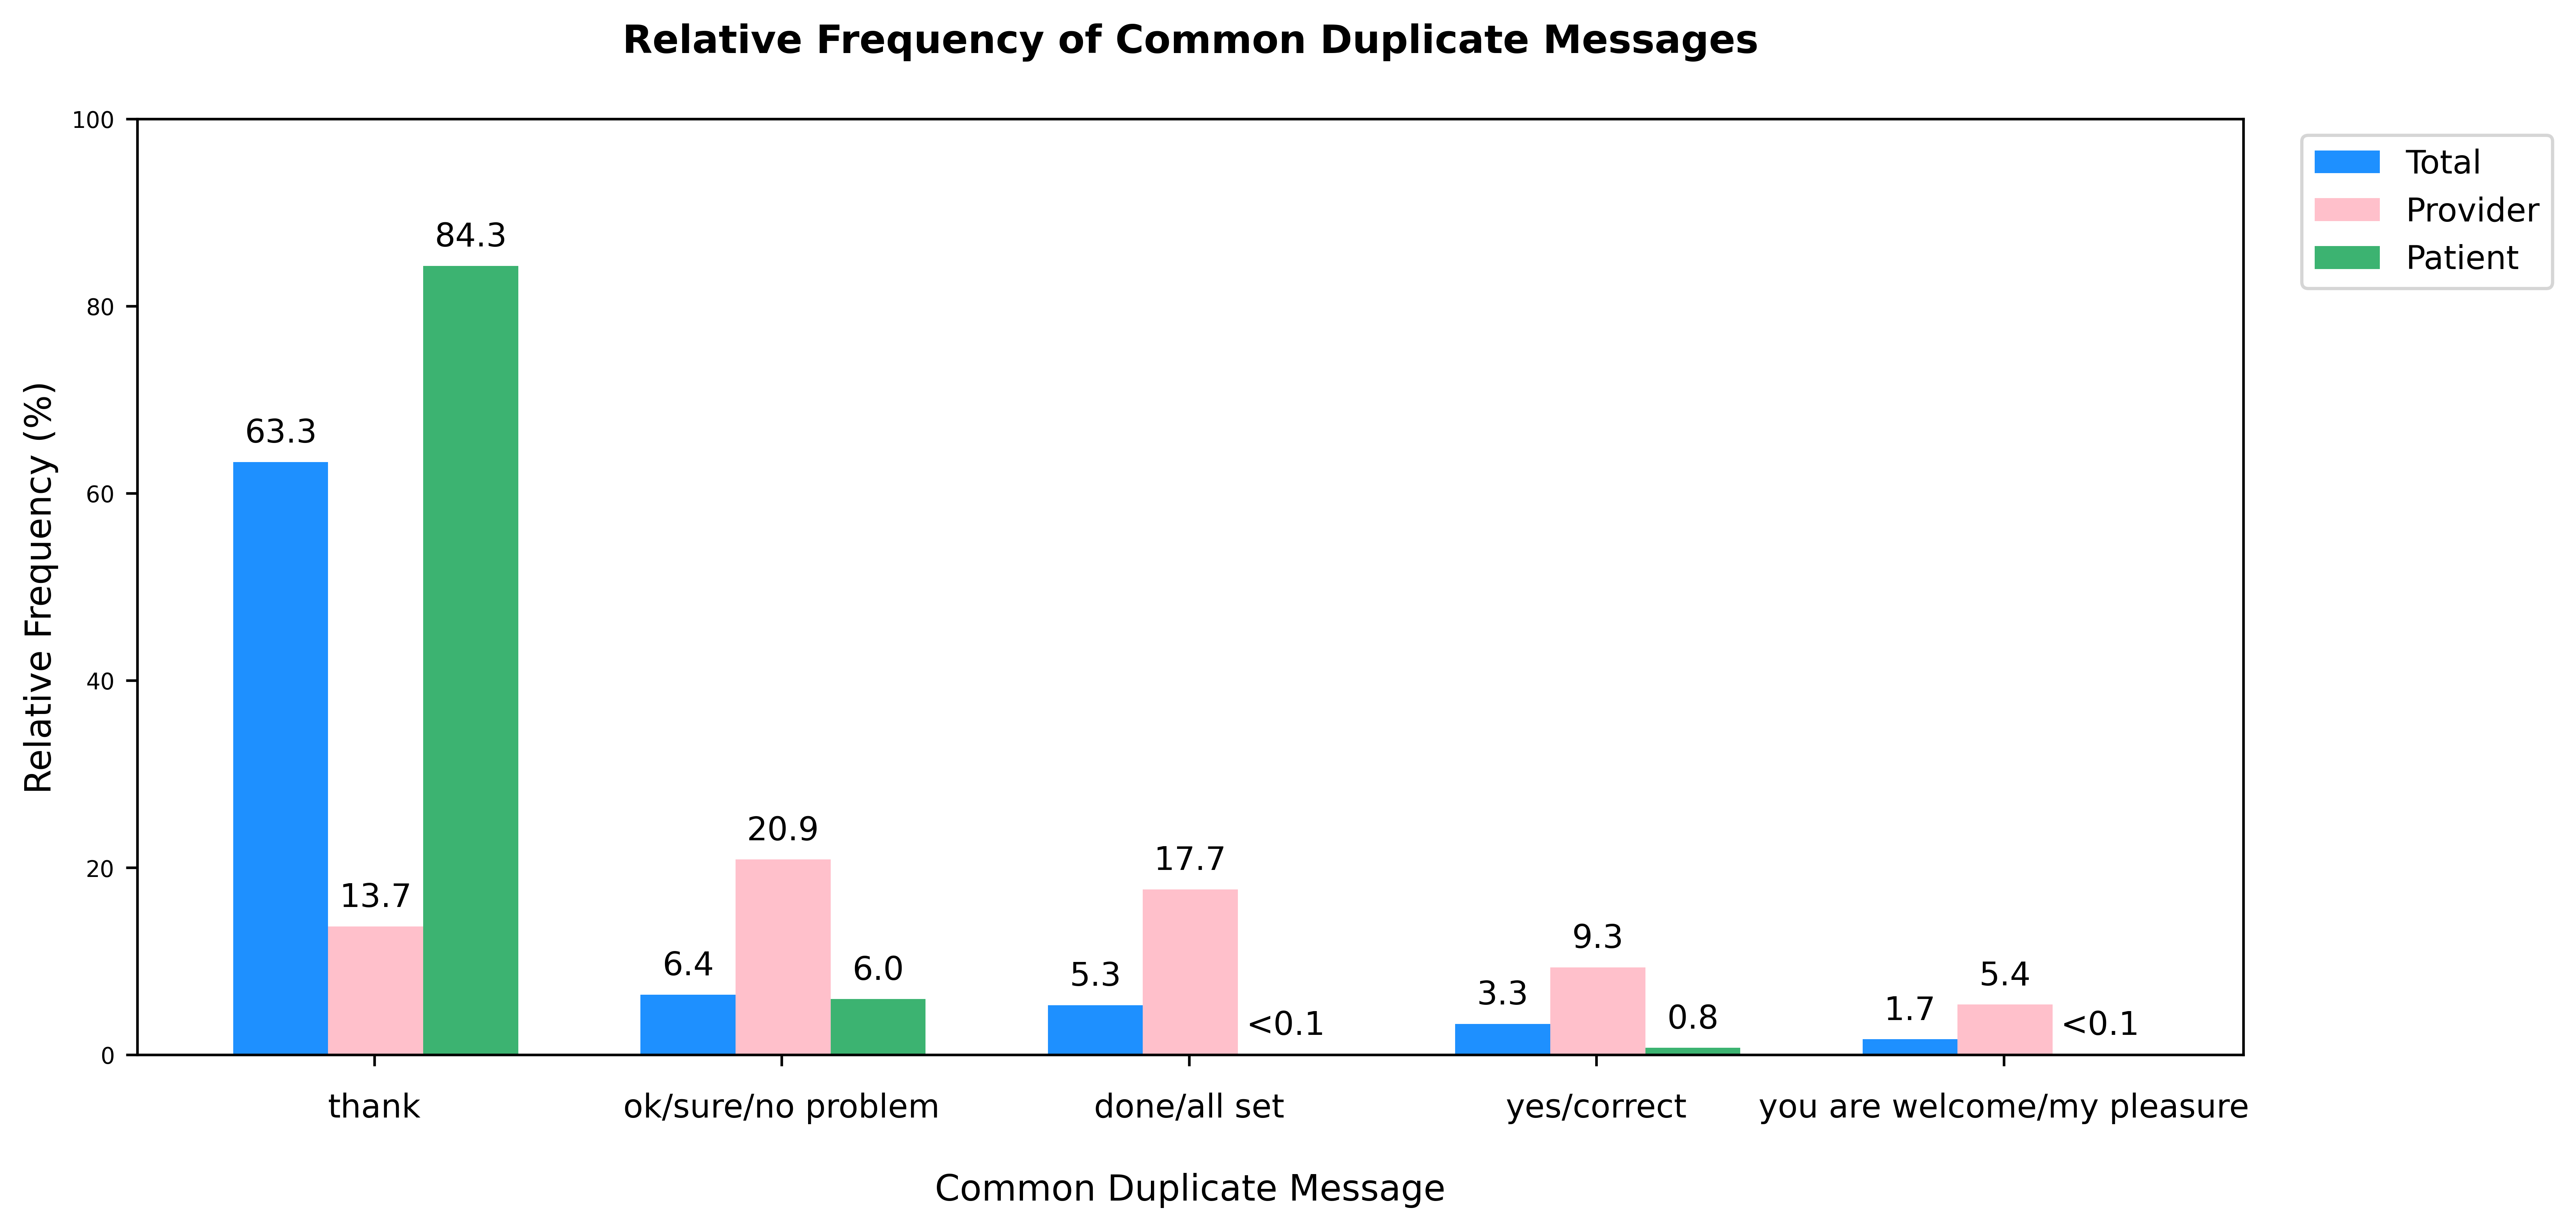

In [ ]:
# plot Relative Frequency of Common Duplicate Messages

xlabels = ["thank", "ok/sure/no problem", "done/all set", "yes/correct", "you are welcome/my pleasure"]

freq_total = 100* duplicate['dup_all'] / ((data.duplicated('MESSAGE_CL')).sum())

freq_pro = 100 * duplicate['dup_pro'] / (data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN']=='Y')]['MESSAGE_CL'].count())

freq_pat = 100 * duplicate['dup_pat'] / (data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN']=='N')]['MESSAGE_CL'].count())

freq = [freq_total, freq_pro, freq_pat]

labels = ["Total", "Provider", "Patient"]

colors = ["dodgerblue", "pink", "mediumseagreen"]

rc('font',**{'family':'serif','serif':['Helvetica']})
rc('text', usetex=False)
rcParams['xtick.major.pad']='8'

plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

fig = plt.figure(figsize = (6,5), dpi=600) 

left, bottom, width, height = 0.1,0.1,1.5,0.8

ax = fig.add_axes([left, bottom, width, height])

labeld_bar(ax, xlabels, freq, labels, colors)

ax.set_xlabel('Common Duplicate Message',fontsize=11, labelpad=15)

ax.set_ylabel("Relative Frequency (%)", fontsize=11)

ax.set_ylim(0, 100)

ax.set_title("Relative Frequency of Common Duplicate Messages", y=1.05, fontsize=12, fontweight='bold')

ax.legend(bbox_to_anchor=(1.02,1), loc="upper left") 

plt.show()



### Providers

4 duplicated providers' messages with length > 20: 

- 2305, 2307 (2306 is patient' message, but mixed with same content of provider's message))

  same physician, different dates

  provider 2305: (2017-11-02)
  "I saw the ultrasound results which also looked okay I will repeat in 1 month( **around Nov 20**) If still going up will get PET scan JK"

  patient 2306: (2017-11-17)
  "Dr Kortmansky Just wanted to let you know that I have an appointment on Monday Nov 20th for the repeat I'm not sure how long it takes to get the results back but hoping you can forward to me before Thanksgiving Hope you are well Thank you **I saw the ultrasound results which also looked okay I will repeat in 1 month( around Nov 20) If still going up will get PET scan** -- --"

    provider 2307: (2017-11-20)
    "I saw the ultrasound results which also looked okay I will repeat in 1 month( **around Nov 20**) If still going up will get PET scan JK"

- 3327, 3328

  same physician same date

  "I think they should be released now"

- 16191, 16192

  same nurse practitioner same date

  "Thank you for the clarification Can I call you this afternoon to discuss Thanks"

- 19533, 19534

  same physician same date

  "Your stress test showed no evidence of decreased blood flow to your heart and normal pumping function( ejection fraction) Please let me know if you have any questions"

In [ ]:
# How many duplicated providers' messages? 503
data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN']=='Y')]['MESSAGE_CL'].count()

503

In [ ]:
# what is the distribution of duplicated providers' messages?
# top 20 duplicated providers' messages
data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN']=='Y')]['MESSAGE_CL'].value_counts(normalize=True)[:20]

All set                 0.105368
#NAME?                  0.059642
Yes                     0.043738
Will do                 0.043738
No problem              0.033797
Thank you               0.033797
Done                    0.031809
Thanks                  0.027833
You are very welcome    0.025845
yes                     0.021869
You're welcome          0.019881
You too                 0.019881
Sure                    0.019881
OK                      0.019881
Ok                      0.017893
Great                   0.015905
:)                      0.015905
Your welcome            0.015905
done                    0.013917
Forwarded to MD         0.013917
Name: MESSAGE_CL, dtype: float64

In [ ]:
# what is the distribution of duplicated providers' messages?
# top 20 duplicated providers' messages
data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN']=='Y')]['MESSAGE_CL'].value_counts(normalize=True)[20:40]

done                             0.013917
Yes please                       0.011928
No                               0.009940
You are all set                  0.009940
sure                             0.009940
You are welcome                  0.009940
Ok Thanks                        0.007952
Any time                         0.007952
Excellent                        0.007952
Not a problem                    0.007952
Ok thanks                        0.007952
thanks                           0.005964
Thank you for letting us know    0.005964
Correct                          0.005964
Great Thanks                     0.005964
Orders are in                    0.005964
I will forward to MD             0.005964
Released                         0.005964
Looks good                       0.005964
Thank you for the update         0.005964
Name: MESSAGE_CL, dtype: float64

In [ ]:
# last 20 duplicated providers' messages
data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN']=='Y')]['MESSAGE_CL'].value_counts(normalize=True)[-21:-1]

Hi                                                                                 0.001988
Thank you for the clarification Can I call you this afternoon to discuss Thanks    0.001988
Done:)                                                                             0.001988
Sure no problem                                                                    0.001988
I will let Dr know                                                                 0.001988
I will check                                                                       0.001988
Will do thanks                                                                     0.001988
You're Welcome                                                                     0.001988
Results released -- Vanna                                                          0.001988
My pleasure JK                                                                     0.001988
Thanks you                                                                      

#### Pattern

we notice that some provider sent same messages (to a same patient ?) on the same date, that might because the patients don't reply to the first message.

e.g., a nurse practitioner (ENC_PROV_ID 29138)  sent 2 same messages "Thank you for the clarification Can I call you this afternoon to discuss Thanks" to patient at 10/25/2016

#### Manually checking

Manually check the 5 suspicious messages: 

row index: 2307, 3328, 16192, 19534, 33419

In [ ]:
# How many duplicated providers' messages are equal or longer than 20?
(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN']=='Y')]['MESSAGE_CL'].str.len() >=20 ).sum()

50

In [ ]:
# print all providers' duplicated messages with length >=20
data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN']=='Y') & (data['MESSAGE_CL'].str.len() >= 20)]['MESSAGE_CL']

2307     I saw the ultrasound results which also looked...
2890                                 Thanks for the update
3314                                  Trending down nicely
3328                   I think they should be released now
4440                         Thank you for letting us know
7196                                  You are very welcome
7299                    Please call 203-200-4822 for appts
7632                                  I will forward to MD
8336                              Thank you for the update
9747                              OK I will await his call
11209                                 You are very welcome
13383                                 You are very welcome
13969                  I have forwarded your message to Dr
14809                   Please call 203-200-4822 for appts
15030                                 You are very welcome
15131                       I forwarded your message to Dr
16192    Thank you for the clarification Can I call you.

In [ ]:
str = "I saw the ultrasound results which also looked okay I will repeat in 1 month"

data[data['MESSAGE_CL'].str.contains(str)]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
2305,3054,2017-11-02,Physician,Patient Message,Patient Medical Advice Request,Y,Y,11570152,1,2740,I saw the ultrasound results which also looked...,717,252
2306,3054,2017-11-17,Physician,Patient Message,Patient Medical Advice Request,N,N,11789919,1,2741,Dr Kortmansky Just wanted to let you know that...,717,252
2307,3054,2017-11-20,Physician,Patient Message,Patient Medical Advice Request,Y,Y,11811712,1,2742,I saw the ultrasound results which also looked...,717,252


In [ ]:
data['MESSAGE_CL'][2305]

'I saw the ultrasound results which also looked okay I will repeat in 1 month( around Nov 20) If still going up will get PET scan JK'

In [ ]:
data['MESSAGE_CL'][2306]

"Dr Kortmansky Just wanted to let you know that I have an appointment on Monday Nov 20th for the repeat I'm not sure how long it takes to get the results back but hoping you can forward to me before Thanksgiving Hope you are well Thank you I saw the ultrasound results which also looked okay I will repeat in 1 month( around Nov 20) If still going up will get PET scan -- --"

In [ ]:
# duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][3327]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
3327,5705,2014-04-04,Physician,Patient Message,Patient Medical Advice Request,Y,Y,686344,1,3992,I think they should be released now,1279,439
3328,5705,2014-04-04,Physician,Patient Message,Patient Medical Advice Request,Y,Y,686343,1,3993,I think they should be released now,1279,439


In [ ]:
# duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][16191]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
16191,29138,2016-10-25,Nurse Practitioner,Patient Message,Patient Medical Advice Request,Y,Y,6822127,1,18643,Thank you for the clarification Can I call you...,820,1975
16192,29138,2016-10-25,Nurse Practitioner,Patient Message,Patient Medical Advice Request,Y,Y,6822114,1,18644,Thank you for the clarification Can I call you...,820,1975


In [ ]:
data['MESSAGE_CL'][16191]

'Thank you for the clarification Can I call you this afternoon to discuss Thanks'

In [ ]:
# duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][19533]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
19533,5340,2013-06-11,Physician,Patient Message,User Message,N,Y,219772,1,22493,Your stress test showed no evidence of decreas...,590,2400
19534,5340,2013-06-11,Physician,Patient Message,Patient Medical Advice Request,Y,Y,219774,1,22494,Your stress test showed no evidence of decreas...,590,2400


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][33419]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
10016,3279,2016-04-19,Physician,Patient Message,User Message,N,Y,4926503,1,11742,Looks good No evidence of recurrence,1258,1261
33419,3279,2018-11-05,Physician,Patient Message,User Message,N,Y,17400864,1,38424,Looks good No evidence of recurrence,292,4167


### Patients

- 14 Patients' duplicated messages with length >= 20 that are sent to same provider: 101,2903,2904,3478,9745,10279,15806,16535,18087,19392,30377,30715,31267,33824

In [ ]:
# How many duplicated patients' messages? 1191
(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN']=='N')])['MESSAGE_CL'].count()

1191

In [ ]:
# How many duplicated patients' messages with length >=20 ? 95
(data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN']=='N')]['MESSAGE_CL'].str.len() >=20 ).sum()

95

In [ ]:
# what is the distribution of duplicated patients' messages?
data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN']=='N')]['MESSAGE_CL'].value_counts(normalize=True)

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        0.372796
Thanks                                                                                                                                                                                                                                        

In [ ]:
# top 20 duplicated patients' messages
data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN']=='N')]['MESSAGE_CL'].value_counts(normalize=True)[:20]

Thank you              0.372796
Thanks                 0.168766
thank you              0.041982
Thank you very much    0.024349
Thank you so much      0.022670
Thanks so much         0.021830
thanks                 0.019312
Ok thanks              0.013434
Ok thank you           0.012594
Thank You              0.010076
Ok                     0.009236
OK thanks              0.007557
#NAME?                 0.007557
Ok Thank you           0.006717
OK Thanks              0.006717
Great thanks           0.006717
Will do                0.006717
Great Thank you        0.005877
Yes                    0.005877
Will do Thank you      0.005877
Name: MESSAGE_CL, dtype: float64

In [ ]:
# last 20 duplicated patients' messages
data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN']=='N')]['MESSAGE_CL'].value_counts(normalize=True)[-21:-1]

Good morning: I have been having some rough nights lately beginning to dread them The Effexor is causing severe restless and severe restless legs during the night I was on Effexor years ago for a short time but the side affects were too much I was hoping to get past them this time The Effexor seems to help with hot flashes I am urinating about every two hours during the night Lastly still having stomach pain I am trying to endure in the hope these side effects will pass I really do n't want to come off the zytiaga right now just received 30 day supply I believe these pills are expensive Thank you                                                                                                                                                                                                                        0.00084
Hi -- Any chance I can move my appt next Thur to 10:30 am Thanks                                                                                                             

In [ ]:
# print all patients' duplicated messages with length >=20
pd.set_option('display.max_rows',100)

data.loc[data.duplicated('MESSAGE_CL') & (data['TO_PAT_YN']=='N')& (data['MESSAGE_CL'].str.len() >=20)]['MESSAGE_CL']

101      Good Afternoon I had an appointment with Dr ye...
1745     I noticed my wife still has a staple in her he...
2899                                New phone 203-393-8175
2901                                 New phone 203-3938175
2903                                New phone 203-393-8175
2904                                New phone 203-393-8175
3478     Dr My insurance is changing as of December 1 2...
4131                      Thank you for getting back to me
4373     I thought I was scheduled for a treatment tomo...
6263     Good morning I need a refill for my Hydrocodon...
6271     Good morning I need a refill for my Hydrocodon...
6346     It is time to get the refill for my Hydrocodon...
6416     It is time to get the refill for my Hydrocodon...
6429     It is time to get the refill for my Hydrocodon...
6463     It is time to get the refill for my Hydrocodon...
6507     It is time to get the refill for my Hydrocodon...
8701     Dear Dr and Dr and I are very concerned about .

#### Pattern

we notice that some patients sent duplicated messages to different providers, that might because patients don't know which providers they should ask for help.

e.g., a patient sent the following messages "Good morning We've had a difficult weekend..." to both nurse practitioner (ENC_PROV_ID 29138) and physician (ENC_PROV_ID 222529) on the same date (6/9/2019)

In [ ]:
data[data['MESSAGE_CL']==data['MESSAGE_CL'][27358]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
27358,29138,2019-06-09,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,21217082,1,31537,Good morning We've had a difficult weekend has...,1051,3465
27359,222529,2019-06-09,Physician,Patient Message,Patient Medical Advice Request,N,N,21217090,1,31538,Good morning We've had a difficult weekend has...,1051,3466


In [ ]:
data['MESSAGE_CL'][27358]

"Good morning We've had a difficult weekend has been very dizzy and dry heaving and generally not feeling well His stomach is hard as a rock and he's gained some weight We are not sure they got all the fluid out( which did happen one other time) Not sure what to do He ca n't continue being this sick he's barely functioning and he's really not eating no appetite Please let us know what we should do next and"

we also notice that some patients sent same messages to the same provider (ENC_PROV_ID 6075) on different dates (4/4/2018 and 4/18/2018) that might because providers do not reply to the first messages and would like to talk with patients in person or on the phone.

"Good Afternoon I had an appointment with Dr yesterday afternoon..."


In [ ]:
data[data['MESSAGE_CL']==data['MESSAGE_CL'][100]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
100,6075,2018-04-04,Physician,Patient Message,Patient Medical Advice Request,N,N,13857328,1,133,Good Afternoon I had an appointment with Dr ye...,487,18
101,6075,2018-04-18,Physician,Patient Message,Patient Medical Advice Request,N,N,14082969,1,134,Good Afternoon I had an appointment with Dr ye...,487,18


In [ ]:
data['MESSAGE_CL'][100]

"Good Afternoon I had an appointment with Dr yesterday afternoon he was good enough to write out a letter for me updating my condition for my employer however unfortunately- they need something a little more Is there any way that I can get a letter from Dr stating that: `` I remain under his care That I had a follow up exam with him yesterday 3 April 2018 for my previous condition colorectal cancer and that I remain in remission and that the condition is stable and that my test results illustrate this ``[ I can print out the test results via this system but they just want a summary letter from Dr] I'm really sorry for the trouble VR"

#### Manually checking

In [ ]:
# duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][101]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
100,6075,2018-04-04,Physician,Patient Message,Patient Medical Advice Request,N,N,13857328,1,133,Good Afternoon I had an appointment with Dr ye...,487,18
101,6075,2018-04-18,Physician,Patient Message,Patient Medical Advice Request,N,N,14082969,1,134,Good Afternoon I had an appointment with Dr ye...,487,18


In [ ]:
data['MESSAGE_CL'][100]

"Good Afternoon I had an appointment with Dr yesterday afternoon he was good enough to write out a letter for me updating my condition for my employer however unfortunately- they need something a little more Is there any way that I can get a letter from Dr stating that: `` I remain under his care That I had a follow up exam with him yesterday 3 April 2018 for my previous condition colorectal cancer and that I remain in remission and that the condition is stable and that my test results illustrate this ``[ I can print out the test results via this system but they just want a summary letter from Dr] I'm really sorry for the trouble VR"

In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][1745]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
1744,7728,2019-07-01,Physician,Patient Message,Patient Medical Advice Request,N,N,21633357,1,2143,I noticed my wife still has a staple in her he...,1062,208
1745,6791,2019-07-01,Physician Assistant,Patient Message,Patient Medical Advice Request,N,N,21633363,1,2144,I noticed my wife still has a staple in her he...,1062,209


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][2899]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
2896,1261,2014-08-29,Physician,Patient Message,Patient Medical Advice Request,N,N,1120973,1,3435,New phone 203-393-8175,1527,341
2899,6055,2014-08-29,Physician,Patient Message,Patient Medical Advice Request,N,N,1120981,1,3438,New phone 203-393-8175,1527,344
2903,1261,2014-09-02,Physician,Patient Message,Patient Medical Advice Request,N,N,1123042,1,3442,New phone 203-393-8175,1527,348
2904,6720,2014-09-02,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,1123046,1,3443,New phone 203-393-8175,1527,349


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][2901]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
2897,6720,2014-08-29,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,1120976,1,3436,New phone 203-3938175,1527,342
2901,6262,2014-08-29,Physician,Patient Message,Patient Medical Advice Request,N,N,1120988,1,3440,New phone 203-3938175,1527,346


In [ ]:
# duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][3478]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
3477,5791,2014-11-28,Physician,Patient Message,Patient Medical Advice Request,N,N,1518365,1,4153,Dr My insurance is changing as of December 1 2...,1089,454
3478,5791,2014-11-28,Physician,Patient Message,Patient Medical Advice Request,N,N,1518371,1,4154,Dr My insurance is changing as of December 1 2...,1089,454


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][4131]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
3254,3054,2016-05-10,Physician,Patient Message,Patient Medical Advice Request,Y,N,5125067,1,3863,Thank you for getting back to me,562,421
4131,29138,2019-04-18,Nurse Practitioner,Patient Message,Patient Medical Advice Request,Y,N,20270858,1,4934,Thank you for getting back to me,425,554
14891,5294,2018-02-15,Physician,Patient Message,Patient Medical Advice Request,Y,N,13083291,1,17157,Thank you for getting back to me,341,1799
14910,6720,2019-03-06,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,19480848,1,17176,Thank you for getting back to me,341,1804
21552,222529,2014-08-19,Physician,Patient Message,Patient Medical Advice Request,Y,N,1079451,1,24869,Thank you for getting back to me,128,2660


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][4373]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
4372,3054,2018-09-10,Physician,Patient Message,Patient Medical Advice Request,N,N,16389014,1,5249,I thought I was scheduled for a treatment tomo...,433,591
4373,1802,2018-09-10,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,16389033,1,5250,I thought I was scheduled for a treatment tomo...,433,592


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][6263]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
6258,6696,2014-06-13,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,881381,1,7350,Good morning I need a refill for my Hydrocodon...,1494,803
6263,6696,2014-07-23,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,994166,1,7355,Good morning I need a refill for my Hydrocodon...,1494,803
6271,6696,2014-08-25,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,1105042,1,7363,Good morning I need a refill for my Hydrocodon...,1494,803


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][6346]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
6342,6696,2016-01-06,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,3994670,1,7434,It is time to get the refill for my Hydrocodon...,1494,807
6346,6696,2016-02-22,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,4392782,1,7438,It is time to get the refill for my Hydrocodon...,1494,807


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][6416]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
6396,5730,2017-05-31,Physician,Patient Message,Patient Medical Advice Request,N,N,9404763,1,7488,It is time to get the refill for my Hydrocodon...,1494,812
6416,5730,2017-07-02,Physician,Patient Message,Patient Medical Advice Request,N,N,9812726,1,7508,It is time to get the refill for my Hydrocodon...,1494,814


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][6429]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
6424,5730,2017-08-08,Physician,Patient Message,Patient Medical Advice Request,N,N,10303354,1,7516,It is time to get the refill for my Hydrocodon...,1494,814
6429,5730,2017-10-24,Physician,Patient Message,Patient Medical Advice Request,N,N,11421165,1,7521,It is time to get the refill for my Hydrocodon...,1494,814


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][6463]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
6444,5730,2018-02-19,Physician,Patient Message,Patient Medical Advice Request,N,N,13132912,1,7536,It is time to get the refill for my Hydrocodon...,1494,814
6463,6696,2018-06-18,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,15054750,1,7555,It is time to get the refill for my Hydrocodon...,1494,819


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][6507]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
6484,6696,2018-10-08,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,16911876,1,7576,It is time to get the refill for my Hydrocodon...,1494,821
6507,6696,2019-01-17,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,18615059,1,7599,It is time to get the refill for my Hydrocodon...,1494,823


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][8701]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
8700,222529,2014-10-23,Physician,Patient Message,Patient Medical Advice Request,N,N,1385979,1,10179,Dear Dr and Dr and I are very concerned about ...,1599,1092
8701,2912,2014-10-23,Physician,Patient Message,Patient Medical Advice Request,N,N,1385982,1,10180,Dear Dr and Dr and I are very concerned about ...,1599,1093


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][8831]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
7714,3054,2019-11-01,Physician,Patient Message,Patient Medical Advice Request,N,N,24079045,1,9036,This message is being sent by on behalf of,1359,968
8831,17139,2020-06-03,Physician,Patient Message,Patient Medical Advice Request,N,N,29359541,1,10353,This message is being sent by on behalf of,1078,1105


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][8848]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
8835,17139,2020-06-04,Physician,Patient Message,Patient Medical Advice Request,Y,N,29398702,1,10357,This message is being sent by on behalf of Thanks,1078,1105
8848,17139,2020-08-27,Physician,Patient Message,Patient Medical Advice Request,Y,N,32424945,1,10373,This message is being sent by on behalf of Thanks,1078,1107


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][8864]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
8863,3054,2020-05-01,Physician,Patient Message,Patient Medical Advice Request,N,N,28521102,1,10390,Hi Dr Thanks for your last message I noticed m...,1502,1113
8864,S0003293,2020-05-01,Physician,Patient Message,Patient Medical Advice Request,N,N,28521678,1,10391,Hi Dr Thanks for your last message I noticed m...,1502,1114


In [ ]:
# duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][9745]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
9744,7744,2013-10-20,Physician,Patient Message,Patient Medical Advice Request,N,N,378803,1,11455,I am going to have my GP Dr call you and talk ...,534,1238
9745,7744,2013-10-20,Physician,Patient Message,Patient Medical Advice Request,N,N,378804,1,11456,I am going to have my GP Dr call you and talk ...,534,1238


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][10258]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
6254,6696,2014-03-24,Nurse Practitioner,Patient Message,Patient Medical Advice Request,Y,N,653888,1,7346,Thank you for your help,1494,803
10258,5660,2020-01-16,Physician,Patient Message,Patient Medical Advice Request,Y,N,25615671,1,12025,Thank you for your help,47,1279


In [ ]:
#  duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][10279]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
10277,5660,2020-05-08,Physician,Patient Message,Patient Medical Advice Request,N,N,28672294,1,12047,Good morning: I have been having some rough ni...,47,1284
10279,5660,2020-05-11,Physician,Patient Message,Patient Medical Advice Request,N,N,28720089,1,12049,Good morning: I have been having some rough ni...,47,1284


In [ ]:
data['MESSAGE_CL'][10279]

"Good morning: I have been having some rough nights lately beginning to dread them The Effexor is causing severe restless and severe restless legs during the night I was on Effexor years ago for a short time but the side affects were too much I was hoping to get past them this time The Effexor seems to help with hot flashes I am urinating about every two hours during the night Lastly still having stomach pain I am trying to endure in the hope these side effects will pass I really do n't want to come off the zytiaga right now just received 30 day supply I believe these pills are expensive Thank you"

In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][10691]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
10690,1802,2017-10-23,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,11400395,1,12498,Hi Apparently I do n't have an appt for tomorr...,1031,1315
10691,3054,2017-10-23,Physician,Patient Message,Patient Medical Advice Request,N,N,11400018,1,12499,Hi Apparently I do n't have an appt for tomorr...,1031,1316


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][10754]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
10753,1802,2018-09-11,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,16434960,1,12561,HiÃ¢â¬â Please have someone() makes appoint...,1031,1337
10754,3054,2018-09-11,Physician,Patient Message,Patient Medical Advice Request,N,N,16435033,1,12562,HiÃ¢â¬â Please have someone() makes appoint...,1031,1338


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][10854]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
10853,13932,2019-10-03,Physician Assistant,Patient Message,Patient Medical Advice Request,N,N,23469820,1,12661,Hi -- Any chance I can move my appt next Thur ...,1031,1369
10854,1802,2019-10-03,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,23469810,1,12662,Hi -- Any chance I can move my appt next Thur ...,1031,1370


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][10909]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
10908,3054,2020-04-28,Physician,Patient Message,Patient Medical Advice Request,N,N,28403374,1,12716,Hi -- I have an US of my neck tomorrow at Plan...,1031,1373
10909,7974,2020-04-28,Physician,Patient Message,Patient Medical Advice Request,N,N,28403389,1,12717,Hi -- I have an US of my neck tomorrow at Plan...,1031,1374


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][10957]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
10956,2219,2018-07-12,Physician,Patient Message,Patient Medical Advice Request,N,N,15449558,1,12790,hello- I met with Dr yesterday- I am unsure of...,690,1377
10957,34440,2018-07-12,Physician,Patient Message,Patient Medical Advice Request,N,N,15449549,1,12791,hello- I met with Dr yesterday- I am unsure of...,690,1378


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][10965]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
10964,2219,2018-10-22,Physician,Patient Message,Patient Medical Advice Request,N,N,17154301,1,12798,Hi I know we are awaiting ins approval to star...,690,1381
10965,34440,2018-10-22,Physician,Patient Message,Patient Medical Advice Request,N,N,17154317,1,12799,Hi I know we are awaiting ins approval to star...,690,1382


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][11546]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
11545,5294,2018-04-25,Physician,Patient Message,Patient Medical Advice Request,N,N,14206629,1,13454,Dr I met with Dr Park todayhad a brain MRI He ...,772,1432
11546,6720,2018-04-25,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,14206758,1,13455,Dr I met with Dr Park todayhad a brain MRI He ...,772,1433


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][13881]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
7195,4564,2019-07-24,Physician,Patient Message,Patient Medical Advice Request,Y,N,22065462,1,8391,Thank you for your prompt response,1324,893
13881,222529,2018-01-03,Physician,Patient Message,Patient Medical Advice Request,Y,N,12419737,1,16091,Thank you for your prompt response,1314,1728
15149,5294,2016-01-06,Physician,Patient Message,Patient Medical Advice Request,Y,N,3998675,1,17466,Thank you for your prompt response,459,1828


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][14891]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
3254,3054,2016-05-10,Physician,Patient Message,Patient Medical Advice Request,Y,N,5125067,1,3863,Thank you for getting back to me,562,421
4131,29138,2019-04-18,Nurse Practitioner,Patient Message,Patient Medical Advice Request,Y,N,20270858,1,4934,Thank you for getting back to me,425,554
14891,5294,2018-02-15,Physician,Patient Message,Patient Medical Advice Request,Y,N,13083291,1,17157,Thank you for getting back to me,341,1799
14910,6720,2019-03-06,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,19480848,1,17176,Thank you for getting back to me,341,1804
21552,222529,2014-08-19,Physician,Patient Message,Patient Medical Advice Request,Y,N,1079451,1,24869,Thank you for getting back to me,128,2660


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][15149]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
7195,4564,2019-07-24,Physician,Patient Message,Patient Medical Advice Request,Y,N,22065462,1,8391,Thank you for your prompt response,1324,893
13881,222529,2018-01-03,Physician,Patient Message,Patient Medical Advice Request,Y,N,12419737,1,16091,Thank you for your prompt response,1314,1728
15149,5294,2016-01-06,Physician,Patient Message,Patient Medical Advice Request,Y,N,3998675,1,17466,Thank you for your prompt response,459,1828


In [ ]:
# duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][15806]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
15805,5237,2020-09-06,Physician,Patient Message,Patient Medical Advice Request,N,N,32823272,1,18221,Hi This is's sister I have not seen her in a w...,1571,1910
15806,5237,2020-09-06,Physician,Patient Message,Patient Medical Advice Request,Y,N,32823274,1,18222,Hi This is's sister I have not seen her in a w...,1571,1910


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][15821]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
15820,5237,2020-06-04,Physician,Patient Message,Patient Medical Advice Request,N,N,29415264,1,18248,Hi Dr I have an appointment on Tuesday at 8:30...,1148,1914
15821,2588,2020-06-04,Physician,Patient Message,Patient Medical Advice Request,N,N,29415275,1,18249,Hi Dr I have an appointment on Tuesday at 8:30...,1148,1915


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][15880]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
15879,5741,2013-08-23,Physician,Patient Message,Patient Medical Advice Request,N,N,300511,1,18308,We are confused regarding the process of obtai...,673,1925
15880,5328,2013-08-23,Physician,Patient Message,Patient Medical Advice Request,N,N,300510,1,18309,We are confused regarding the process of obtai...,673,1926


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][15889]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
15888,6837,2013-10-11,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,367513,1,18317,Last appointment I asked for a letter saying I...,673,1929
15889,5328,2013-10-11,Physician,Patient Message,Patient Medical Advice Request,N,N,367512,1,18318,Last appointment I asked for a letter saying I...,673,1930


In [ ]:
# duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][16535]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
16534,3636,2020-02-19,Physician,Patient Message,Patient Medical Advice Request,N,N,26403764,1,19021,I have to reschedule today Ã¢â¬â¢ s appointm...,1171,2018
16535,3636,2020-02-19,Physician,Patient Message,Patient Medical Advice Request,N,N,26403777,1,19022,I have to reschedule today Ã¢â¬â¢ s appointm...,1171,2018


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][18042]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
18031,6837,2015-10-15,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,3348659,1,20783,Do u have tumor marker results,1606,2244
18042,6837,2015-12-10,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,3816107,1,20794,Do u have tumor marker results,1606,2244


In [ ]:
# duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][18087]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
18086,5559,2020-04-16,Physician,Patient Message,Patient Medical Advice Request,N,N,28117090,1,20842,Dr Yu I lifted a large tub about 6 weeks ago a...,1507,2255
18087,5559,2020-04-20,Physician,Patient Message,Patient Medical Advice Request,N,N,28189528,1,20843,Dr Yu I lifted a large tub about 6 weeks ago a...,1507,2255


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][18320]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
18319,6075,2020-07-09,Physician,Patient Message,Patient Medical Advice Request,N,N,30683426,1,21090,Hello I was just wondering if my results of my...,266,2280
18320,209978,2020-07-09,Physician,Patient Message,Patient Medical Advice Request,N,N,30683423,1,21091,Hello I was just wondering if my results of my...,266,2281


In [ ]:
 # not duplicated
 data[data['MESSAGE_CL']==data['MESSAGE_CL'][18367]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
18364,204690,2016-11-29,Physician,Patient Message,Patient Medical Advice Request,Y,N,7195001,1,21140,Thank you& amp# 128536,549,2285
18367,204690,2016-12-06,Physician,Patient Message,Patient Medical Advice Request,Y,N,7280850,1,21143,Thank you& amp# 128536,549,2285
18383,204690,2017-01-25,Physician,Patient Message,Patient Medical Advice Request,Y,N,7812500,1,21159,Thank you& amp# 128536,549,2285


`& amp# 128536` is Unicode decimal code for emoji "Face Throwing A Kiss" 😚

In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][18524]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
18519,29138,2019-02-01,Nurse Practitioner,Patient Message,Patient Medical Advice Request,Y,N,18863856,1,21301,had blood work done this morning,239,2293
18524,29138,2019-02-20,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,19217385,1,21306,had blood work done this morning,239,2293


In [ ]:
# duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][19392]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
19391,5328,2018-09-21,Physician,Patient Message,Patient Medical Advice Request,N,N,16627999,1,22351,I need a refill on my Zoloft 75mg,963,2399
19392,5328,2018-09-21,Physician,Patient Message,Patient Medical Advice Request,N,N,16628036,1,22352,I need a refill on my Zoloft 75mg,963,2399


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][19682]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
18107,222529,2017-04-10,Physician,Patient Message,Patient Medical Advice Request,Y,N,8729298,1,20864,Thanks for the quick reply,193,2258
19682,5328,2015-07-07,Physician,Patient Message,Patient Medical Advice Request,Y,N,2557549,1,22685,Thanks for the quick reply,941,2432
31518,5660,2018-01-22,Physician,Patient Message,Patient Medical Advice Request,Y,N,12670432,1,36310,Thanks for the quick reply,710,3943


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][20688]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
20687,5328,2017-08-17,Physician,Patient Message,Patient Medical Advice Request,N,N,10421796,1,23895,Good morning The pharmacy has called me with t...,1084,2555
20688,10675,2017-08-17,Physician,Patient Message,Patient Medical Advice Request,N,N,10421811,1,23896,Good morning The pharmacy has called me with t...,1084,2556


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][21552]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
3254,3054,2016-05-10,Physician,Patient Message,Patient Medical Advice Request,Y,N,5125067,1,3863,Thank you for getting back to me,562,421
4131,29138,2019-04-18,Nurse Practitioner,Patient Message,Patient Medical Advice Request,Y,N,20270858,1,4934,Thank you for getting back to me,425,554
14891,5294,2018-02-15,Physician,Patient Message,Patient Medical Advice Request,Y,N,13083291,1,17157,Thank you for getting back to me,341,1799
14910,6720,2019-03-06,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,19480848,1,17176,Thank you for getting back to me,341,1804
21552,222529,2014-08-19,Physician,Patient Message,Patient Medical Advice Request,Y,N,1079451,1,24869,Thank you for getting back to me,128,2660


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][22162]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
22161,222529,2019-12-04,Physician,Patient Message,Patient Medical Advice Request,N,N,24763836,1,25546,Do you participate in Aetna,809,2748
22162,6184,2019-12-04,Physician,Patient Message,Patient Medical Advice Request,N,N,24763799,1,25547,Do you participate in Aetna,809,2749


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][22516]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
6727,5705,2020-09-10,Physician,Patient Message,Patient Medical Advice Request,Y,N,33001810,1,7850,Thank you so much for your help,1564,851
22516,1494,2014-04-21,Nurse Practitioner,Patient Message,Patient Medical Advice Request,Y,N,725131,1,25920,Thank you so much for your help,1297,2787


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][22811]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
19989,4564,2018-02-23,Physician,Patient Message,Patient Medical Advice Request,Y,N,13215506,1,23065,Thanks for getting back to me,1328,2496
22811,5660,2019-01-08,Physician,Patient Message,Patient Medical Advice Request,Y,N,18449667,1,26274,Thanks for getting back to me,224,2819


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][22935]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
22886,5660,2019-09-24,Physician,Patient Message,Patient Medical Advice Request,N,N,23250376,1,26349,Can I get a oxycodone refill,224,2821
22935,5660,2020-02-28,Physician,Patient Message,Patient Medical Advice Request,N,N,26619624,1,26398,Can I get a oxycodone refill,224,2829


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][23380]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
23379,5812,2013-12-05,Physician,Patient Message,Patient Medical Advice Request,N,N,448582,1,26932,Reluctantly I have been brought by recent news...,209,2873
23380,6203,2013-12-05,Physician,Patient Message,Patient Medical Advice Request,N,N,448591,1,26933,Reluctantly I have been brought by recent news...,209,2874


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][24658]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
24631,5705,2018-02-13,Physician,Patient Message,Patient Medical Advice Request,N,N,13054358,1,28363,Thank you RobinÃ¢â¬Â¦:-),1083,3031
24658,5705,2018-07-02,Physician,Patient Message,Patient Medical Advice Request,Y,N,15276822,1,28390,Thank you RobinÃ¢â¬Â¦:-),1083,3037
24668,5705,2018-08-09,Physician,Patient Message,Patient Medical Advice Request,N,N,15901716,1,28400,Thank you RobinÃ¢â¬Â¦:-),1083,3040
24747,5705,2019-04-03,Physician,Patient Message,Patient Medical Advice Request,Y,N,19997360,1,28479,Thank you RobinÃ¢â¬Â¦:-),1083,3060


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][25426]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
10711,1802,2018-01-29,Nurse Practitioner,Patient Message,Patient Medical Advice Request,Y,N,12798066,1,12519,Thank you See you tomorrow,1031,1321
25426,29145,2020-01-07,Physician,Patient Message,Patient Medical Advice Request,Y,N,25410709,1,29266,Thank you See you tomorrow,1247,3158


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][25443]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
11212,222529,2019-11-05,Physician,Patient Message,Patient Medical Advice Request,Y,N,24154695,1,13087,Great Thank you so much,115,1399
25443,29145,2020-02-03,Physician,Patient Message,Patient Medical Advice Request,Y,N,26006009,1,29283,Great Thank you so much,1247,3158


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][26118]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
3194,6738,2013-12-13,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,462581,1,3796,This message is being sent by on behalf of Tha...,770,407
26118,12522,2016-01-22,Physician,Patient Message,Patient Medical Advice Request,Y,N,4130232,1,30089,This message is being sent by on behalf of Tha...,382,3258
26144,12522,2016-10-20,Physician,Patient Message,Patient Medical Advice Request,Y,N,6772395,1,30115,This message is being sent by on behalf of Tha...,382,3258
26148,12522,2016-10-26,Physician,Patient Message,Patient Medical Advice Request,Y,N,6844386,1,30119,This message is being sent by on behalf of Tha...,382,3258
26196,1261,2018-11-21,Physician,Patient Message,Patient Medical Advice Request,N,N,17702980,1,30168,This message is being sent by on behalf of Tha...,382,3267


In [ ]:
# a format of "Thank you"
data['MESSAGE_CL'][26118]

'This message is being sent by on behalf of Thank you'

In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][26158]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
26157,12522,2017-07-24,Physician,Patient Message,Patient Medical Advice Request,N,N,10094161,1,30129,This message is being sent by on behalf of is ...,382,3258
26158,1261,2017-07-24,Physician,Patient Message,Patient Medical Advice Request,N,N,10094166,1,30130,This message is being sent by on behalf of is ...,382,3259


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][26499]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
8514,8351,2020-05-27,Physician,Patient Message,Patient Medical Advice Request,Y,N,29163067,1,9985,Thank you so much See you soon,8,1077
26499,2219,2020-08-10,Physician,Patient Message,User Message,Y,N,31741963,1,30517,Thank you so much See you soon,1124,3324


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][27359]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
27358,29138,2019-06-09,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,21217082,1,31537,Good morning We've had a difficult weekend has...,1051,3465
27359,222529,2019-06-09,Physician,Patient Message,Patient Medical Advice Request,N,N,21217090,1,31538,Good morning We've had a difficult weekend has...,1051,3466


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][30039]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
30038,5705,2016-01-01,Physician,Patient Message,Patient Medical Advice Request,N,N,3953591,1,34571,Hi Dr was released from today I noticed that h...,826,3792
30039,12307,2016-01-01,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,3953592,1,34572,Hi Dr was released from today I noticed that h...,826,3793


In [ ]:
# duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][30377]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
30376,5791,2020-03-30,Physician,Patient Message,Patient Medical Advice Request,N,N,27661816,1,34965,Hello Clinical team continues to have a fever ...,693,3833
30377,5791,2020-03-30,Physician,Patient Message,Patient Medical Advice Request,Y,N,27661835,1,34966,Hello Clinical team continues to have a fever ...,693,3833


In [ ]:
# duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][30715]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
30714,5344,2016-08-04,Physician,Patient Message,Patient Medical Advice Request,Y,N,5946920,1,35376,had his port placement yesterday and they sugg...,406,3861
30715,5344,2016-08-05,Physician,Patient Message,Patient Medical Advice Request,N,N,5956475,1,35377,had his port placement yesterday and they sugg...,406,3861


In [ ]:
# duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][31267]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
31266,29373,2020-03-18,Physician,Patient Message,Patient Medical Advice Request,N,N,27135394,1,36049,Did the new scan show a reduction in the bladd...,1008,3914
31267,29373,2020-03-25,Physician,Patient Message,Patient Medical Advice Request,N,N,27547259,1,36050,Did the new scan show a reduction in the bladd...,1008,3914


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][31516]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
31515,5660,2018-01-22,Physician,Patient Message,Patient Medical Advice Request,N,N,12669904,1,36307,: We need to talk today( Monday) If the PSA fr...,710,3941
31516,29138,2018-01-22,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,12669919,1,36308,: We need to talk today( Monday) If the PSA fr...,710,3942


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][31582]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
31581,5660,2018-08-24,Physician,Patient Message,Patient Medical Advice Request,N,N,16151534,1,36373,I don Ã¢â¬â¢ t know if this is a problem but...,710,3947
31582,6073,2018-08-24,Physician,Patient Message,Patient Medical Advice Request,N,N,16151548,1,36374,I don Ã¢â¬â¢ t know if this is a problem but...,710,3948


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][31760]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
31759,S0003293,2017-06-26,Physician,Patient Message,Patient Medical Advice Request,N,N,9718509,1,36578,How does radiation treatment work on Cancer,740,3986
31760,6075,2017-06-26,Physician,Patient Message,Patient Medical Advice Request,N,N,9718508,1,36579,How does radiation treatment work on Cancer,740,3987


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][32935]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
32659,1403,2014-12-15,Physician,Patient Message,Patient Medical Advice Request,N,N,1585734,1,37582,Hi Did any of my markers come back Thanks,6,4134
32935,1403,2016-01-26,Physician,Patient Message,Patient Medical Advice Request,N,N,4158656,1,37860,Hi Did any of my markers come back Thanks,6,4140


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][33309]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
33307,29138,2019-04-07,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,20051983,1,38257,please release my psa results,207,4152
33309,29138,2019-06-15,Nurse Practitioner,Patient Message,Patient Medical Advice Request,N,N,21347035,1,38259,please release my psa results,207,4152


In [ ]:
#  duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][33824]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
33823,10266,2018-06-05,Physician,Patient Message,Patient Medical Advice Request,N,N,14858795,1,38886,We thought a prescription for a steroid was be...,1302,4205
33824,10266,2018-06-05,Physician,Patient Message,Patient Medical Advice Request,N,N,14858844,1,38887,We thought a prescription for a steroid was be...,1302,4205


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][34997]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
34996,5544,2019-01-04,Physician,Patient Message,Patient Medical Advice Request,N,N,18380242,1,40272,Information for my chart: In reference to form...,1378,4357
34997,6075,2019-01-04,Physician,Patient Message,Patient Medical Advice Request,N,N,18380246,1,40273,Information for my chart: In reference to form...,1378,4358


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][35667]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
35666,1355,2020-04-05,Physician,Patient Message,Patient Medical Advice Request,N,N,27840076,1,41097,and watching the news in recent days it Ã¢â¬â...,1332,4498
35667,5912,2020-04-05,Physician,Patient Message,Patient Medical Advice Request,N,N,27840080,1,41098,and watching the news in recent days it Ã¢â¬â...,1332,4499


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][36994]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
36992,222529,2019-11-17,Physician,Patient Message,Patient Medical Advice Request,N,N,24403357,1,42672,Please send request for blood test for Thursda...,1033,4679
36994,222529,2020-02-24,Physician,Patient Message,Patient Medical Advice Request,N,N,26484010,1,42674,Please send request for blood test for Thursda...,1033,4679


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][37830]] 

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
37829,3054,2020-04-27,Physician,Patient Message,Patient Medical Advice Request,N,N,28356253,1,43632,Dear Dr Now that I have finished my radiation ...,370,4787
37830,69424,2020-04-27,Physician,Patient Message,Patient Medical Advice Request,N,N,28356296,1,43633,Dear Dr Now that I have finished my radiation ...,370,4788


In [ ]:
# not duplicated
data[data['MESSAGE_CL']==data['MESSAGE_CL'][37943]]

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID
37158,210095,2018-10-08,Physician,Patient Message,Patient Medical Advice Request,N,N,16910443,1,42852,Should I get a flu shot,624,4695
37943,3054,2014-10-16,Physician,Patient Message,Patient Medical Advice Request,N,N,1357192,1,43749,Should I get a flu shot,1221,4795


# Summary Statistics

In [8]:
# create a copy of dataset data_drop_duplicated called data2 for exploratory analysis
data2 = data_drop_duplicated.copy(deep=True)

In [9]:
# create indicator column MSG_SENDER for TO_PAT_YN 1: provider's message; 0: patient's message
data2['MSG_SENDER'] = (data2['TO_PAT_YN'] == 'Y').astype(int)

In [10]:
# create YEAR column to store year of message date
data2['YEAR'] = data2['DATE_OF_MESSAGE'].dt.year

In [ ]:
# How many unique providers do we have? 202
len(pd.unique(data2['ENC_PROV_ID']))

202

In [ ]:
# How many unique providers do we have? 1622
len(pd.unique(data2['PAT_ID_NEW']))

1622

## Conversation

In [ ]:
# How many unique conversations? 4901
len(pd.unique(data2['CONVERSATION_ID']))

4901

In [11]:
# duration of a conversation (days)
conversation = data2.sort_values(by='DATE_OF_MESSAGE').groupby('CONVERSATION_ID')['DATE_OF_MESSAGE'].apply(lambda g: g.max() - g.min()).reset_index(name='duration')

# message count of a conversation
conversation['msg_count_overall'] = data2.groupby('CONVERSATION_ID').size().reset_index()[0]

# patients' message count of a conversation
conversation['msg_count_pat'] = data2[data2['MSG_SENDER']==0].groupby('CONVERSATION_ID').size().reset_index()[0]

#  providers' message count of a conversation
conversation['msg_count_pro'] = data2[data2['MSG_SENDER']==1].groupby('CONVERSATION_ID').size().reset_index()[0]



In [12]:
# summary statistics of duration and message count (overall, by provider and patient)
sum_conv = conversation.describe() 
sum_conv['duration'] = sum_conv['duration'].astype('timedelta64[D]') / np.timedelta64(1, 'D')

range = []
mean_sd = [] 
median_range = []

for col in sum_conv.columns:
  range.append("({}, {})".format(round(sum_conv.loc[['min'],[col]].values[0][0], 1), round(sum_conv.loc[['max'],[col]].values[0][0], 1)))
  mean_sd.append("{} ({})".format(round(sum_conv.loc[['mean'],[col]].values[0][0], 1), round(sum_conv.loc[['std'],[col]].values[0][0], 1)))
  median_range.append("{} ({}, {})".format(round(sum_conv.loc[['50%'],[col]].values[0][0], 1), round(sum_conv.loc[['min'],[col]].values[0][0], 1), round(sum_conv.loc[['max'],[col]].values[0][0], 1)))

sum_conv.loc['range'] = range 
sum_conv.loc['Mean (SD)'] = mean_sd
sum_conv.loc['Median (Range)'] = median_range

In [ ]:
sum_conv

,CONVERSATION_ID,duration,msg_count_overall,msg_count_pat,msg_count_pro
count,4901,4901,4901,4586,3598
mean,2451.12,108,7.89288,5.0519,4.31212
std,1415.12,275,16.1198,9.81588,7.48759
min,1,0,1,1,1
25%,1226,0,1,1,1
50%,2451,2,3,2,2
75%,3676,70,7,5,4
max,4902,2894,291,166,125
range,"(1.0, 4902.0)","(0.0, 2894.0)","(1.0, 291.0)","(1.0, 166.0)","(1.0, 125.0)"
Mean (SD),2451.1 (1415.1),108.0 (275.0),7.9 (16.1),5.1 (9.8),4.3 (7.5)


In [ ]:
# what's the distribution of a conversation duration
# most duration is within one day: 40.9%
conversation['duration'].value_counts(normalize=True) 

0 days      0.408896
1 days      0.075699
2 days      0.030606
3 days      0.021424
4 days      0.012650
              ...   
818 days    0.000204
687 days    0.000204
973 days    0.000204
625 days    0.000204
274 days    0.000204
Name: duration, Length: 692, dtype: float64

In [13]:
freq_msg_count_overall = conversation['msg_count_overall'].value_counts(normalize=True).sort_index()

freq_msg_count_pro = conversation['msg_count_pro'].value_counts(normalize=True).sort_index()

freq_msg_count_pat = conversation['msg_count_pat'].value_counts(normalize=True).sort_index()

freq_msg_count = [freq_msg_count_overall,freq_msg_count_pro,freq_msg_count_pat]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


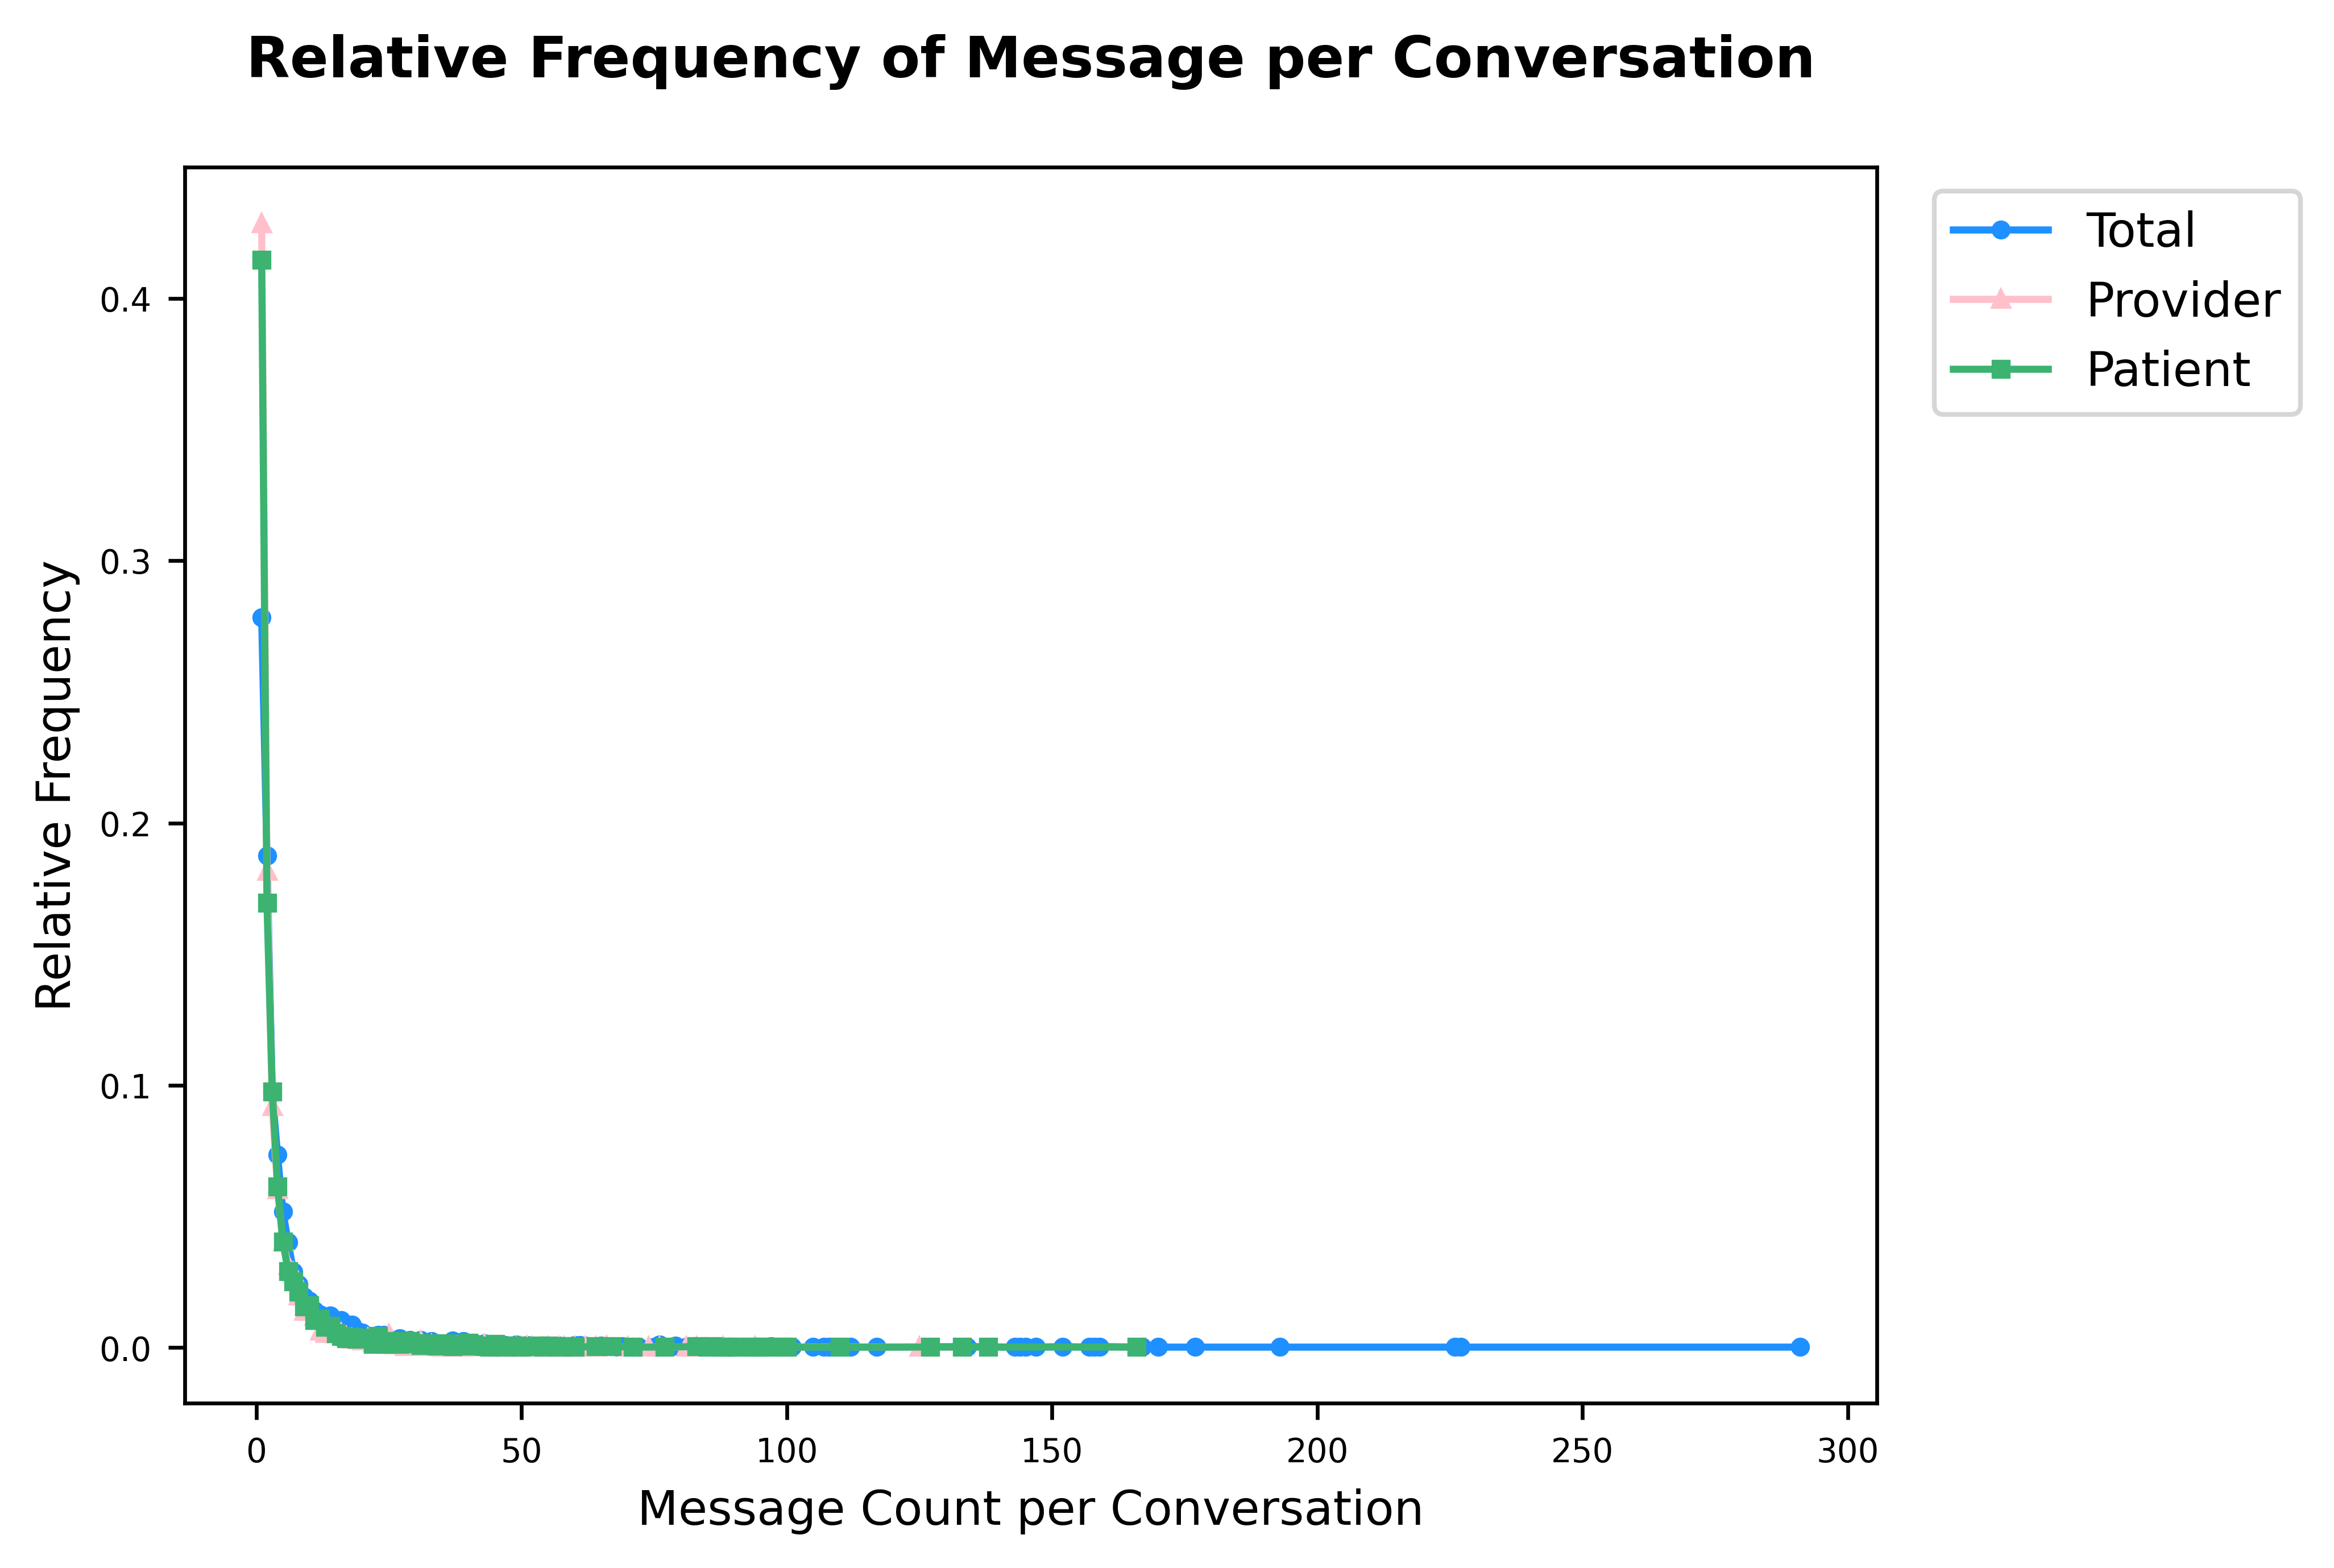

In [ ]:
# plot Relative Frequency of Message Count per Conversation (Overall, by provider and patient)
# similar distribution
rc('font',**{'family':'serif','serif':['Helvetica']})
rc('text', usetex=False)

plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

fig = plt.figure(figsize = (6.4, 4.8), dpi=600) 

labels = ["Total", "Provider", "Patient"]
markers = ['o','^','s']
colors = ["dodgerblue", "pink", "mediumseagreen"]

for i, freq in enumerate(freq_msg_count):
  plt.plot(freq, marker=markers[i], markersize = 3, color=colors[i], label = labels[i])


plt.xlabel("Message Count per Conversation")

plt.ylabel("Relative Frequency")

plt.title("Relative Frequency of Message per Conversation", y=1.05, fontsize=12, fontweight='bold')

plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")

plt.show()

In [ ]:
# distribution of message count in a conversation
# most conversation has only 1 message (27.8%)
conversation['msg_count_overall'].value_counts(normalize=True) 

1      0.278311
2      0.187513
3      0.097123
4      0.073454
5      0.051826
         ...   
117    0.000204
109    0.000204
105    0.000204
101    0.000204
177    0.000204
Name: msg_count_overall, Length: 108, dtype: float64

In [ ]:
# distribution of providers' message count in a conversation
# most conversation has 1 message (42.9%)
conversation['msg_count_pro'].value_counts(normalize=True) 

1.0      0.428571
2.0      0.181768
3.0      0.091996
4.0      0.060311
5.0      0.040300
6.0      0.031406
7.0      0.028627
8.0      0.019733
10.0     0.014452
9.0      0.013897
11.0     0.011951
12.0     0.006392
14.0     0.005837
16.0     0.005559
13.0     0.005559
15.0     0.005281
25.0     0.005003
17.0     0.004169
21.0     0.003613
18.0     0.003335
19.0     0.003057
20.0     0.002779
31.0     0.002501
24.0     0.002223
23.0     0.002223
22.0     0.001946
27.0     0.001390
30.0     0.001390
33.0     0.001112
26.0     0.001112
29.0     0.001112
43.0     0.001112
41.0     0.000556
51.0     0.000556
66.0     0.000556
28.0     0.000556
36.0     0.000556
34.0     0.000556
32.0     0.000556
94.0     0.000278
52.0     0.000278
44.0     0.000278
39.0     0.000278
125.0    0.000278
76.0     0.000278
38.0     0.000278
58.0     0.000278
62.0     0.000278
46.0     0.000278
50.0     0.000278
49.0     0.000278
35.0     0.000278
83.0     0.000278
55.0     0.000278
57.0     0.000278
70.0     0

In [ ]:
# distribution of patients' message count in a conversation
# most conversation has 1 message (41.5%)
conversation['msg_count_pat'].value_counts(normalize=True) 

1.0      0.414741
2.0      0.169647
3.0      0.097689
4.0      0.061491
5.0      0.040340
6.0      0.029219
7.0      0.025294
8.0      0.021369
10.0     0.016136
9.0      0.015700
12.0     0.010903
11.0     0.010467
14.0     0.008286
13.0     0.007850
15.0     0.005451
23.0     0.004361
16.0     0.004361
18.0     0.003925
20.0     0.003707
21.0     0.003707
17.0     0.003489
19.0     0.003271
29.0     0.002399
26.0     0.002399
25.0     0.001962
40.0     0.001744
28.0     0.001744
36.0     0.001526
30.0     0.001526
32.0     0.001526
24.0     0.001308
45.0     0.001308
33.0     0.001308
22.0     0.001308
27.0     0.001308
38.0     0.000872
41.0     0.000872
31.0     0.000872
35.0     0.000872
48.0     0.000654
55.0     0.000654
34.0     0.000654
42.0     0.000654
49.0     0.000654
39.0     0.000654
53.0     0.000654
58.0     0.000436
46.0     0.000436
67.0     0.000436
83.0     0.000436
59.0     0.000436
37.0     0.000436
43.0     0.000436
64.0     0.000436
86.0     0.000436
51.0     0

## Trend

In [ ]:
# what is the time period? from 2012-05-29 to 2020-09-12
min(data2['DATE_OF_MESSAGE']), max(data2['DATE_OF_MESSAGE'])

(Timestamp('2012-05-29 00:00:00'), Timestamp('2020-09-12 00:00:00'))

In [14]:
# what is the distribution of messages by year?
frequency = pd.DataFrame(data2['DATE_OF_MESSAGE'].dt.year.value_counts(normalize=True))

frequency = frequency.rename(columns={'DATE_OF_MESSAGE':'Fre_MSG_OVERALL'})

frequency['Fre_MSG_PRO'] = data2[data2['MSG_SENDER']==1]['DATE_OF_MESSAGE'].dt.year.value_counts(normalize=True)

frequency['Fre_MSG_PAT'] = data2[data2['MSG_SENDER']==0]['DATE_OF_MESSAGE'].dt.year.value_counts(normalize=True)

frequency['year'] = frequency.index 

frequency = frequency.sort_values(by=['year']) 


,Fre_MSG_OVERALL,Fre_MSG_PRO,Fre_MSG_PAT,year
2012,0.000414,0.000258,0.000518,2012
2013,0.030246,0.028682,0.031293,2013
2014,0.066670,0.061167,0.070356,2014
2015,0.064705,0.062714,0.066039,2015
2016,0.092831,0.092491,0.093059,2016
2017,0.120802,0.118530,0.122324,2017
2018,0.160768,0.160361,0.161041,2018
2019,0.224672,0.228231,0.222289,2019
2020,0.238890,0.247567,0.233080,2020


In [15]:
frequency

,Fre_MSG_OVERALL,Fre_MSG_PRO,Fre_MSG_PAT,year
2012,0.000414,0.000258,0.000518,2012
2013,0.030246,0.028682,0.031293,2013
2014,0.066670,0.061167,0.070356,2014
2015,0.064705,0.062714,0.066039,2015
2016,0.092831,0.092491,0.093059,2016
2017,0.120802,0.118530,0.122324,2017
2018,0.160768,0.160361,0.161041,2018
2019,0.224672,0.228231,0.222289,2019
2020,0.238890,0.247567,0.233080,2020


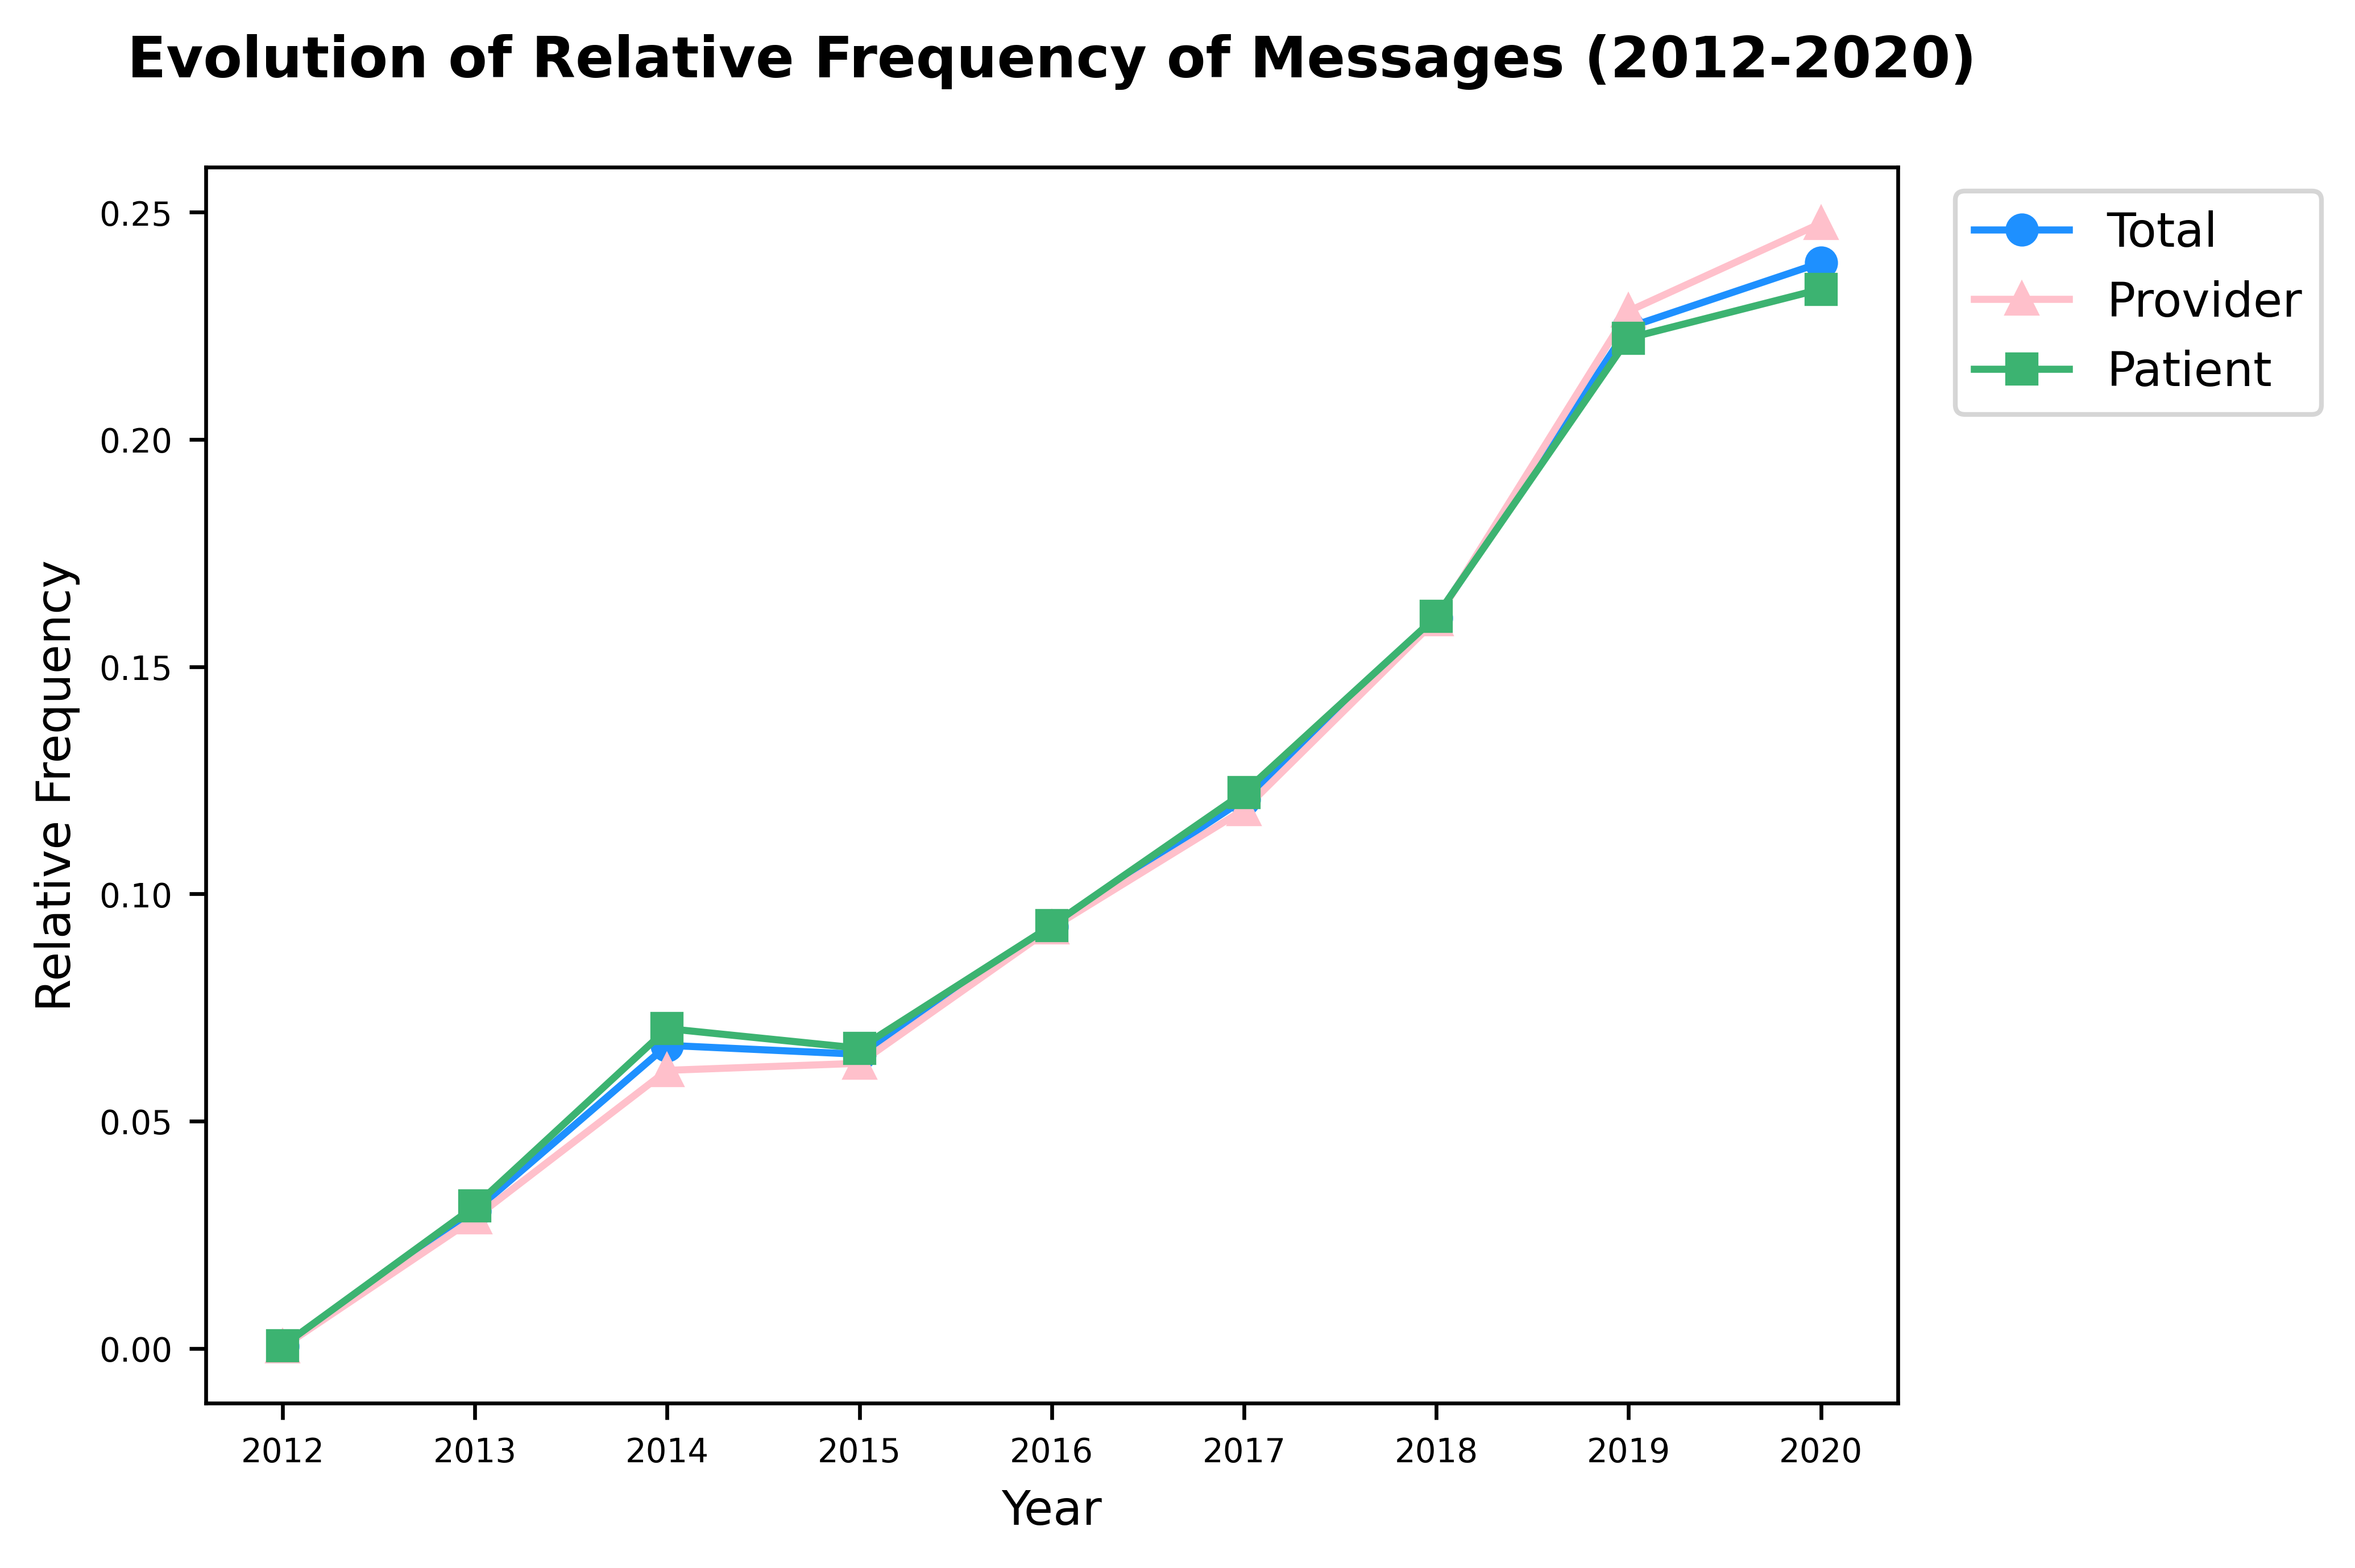

In [ ]:
# plot Evolution of Relative Frequency of Messages (2012-2020)
rc('font',**{'family':'serif','serif':['Helvetica']})
rc('text', usetex=False)

fig = plt.figure(figsize = (6.4, 4.8), dpi=600)

plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

labels = ["Total", "Provider", "Patient"]
markers = ['o','^','s']
colors = ["dodgerblue", "pink", "mediumseagreen"]

for i, col in enumerate(frequency.columns[:-1]):
  plt.plot(frequency['year'], frequency[col], marker=markers[i], color=colors[i], label = labels[i])


plt.xlabel("Year")

plt.ylabel("Relative Frequency")

plt.title("Evolution of Relative Frequency of Messages (2012-2020)", y=1.05, fontsize=12, fontweight='bold')

plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")

plt.show()

## Plot Conversation and Trend

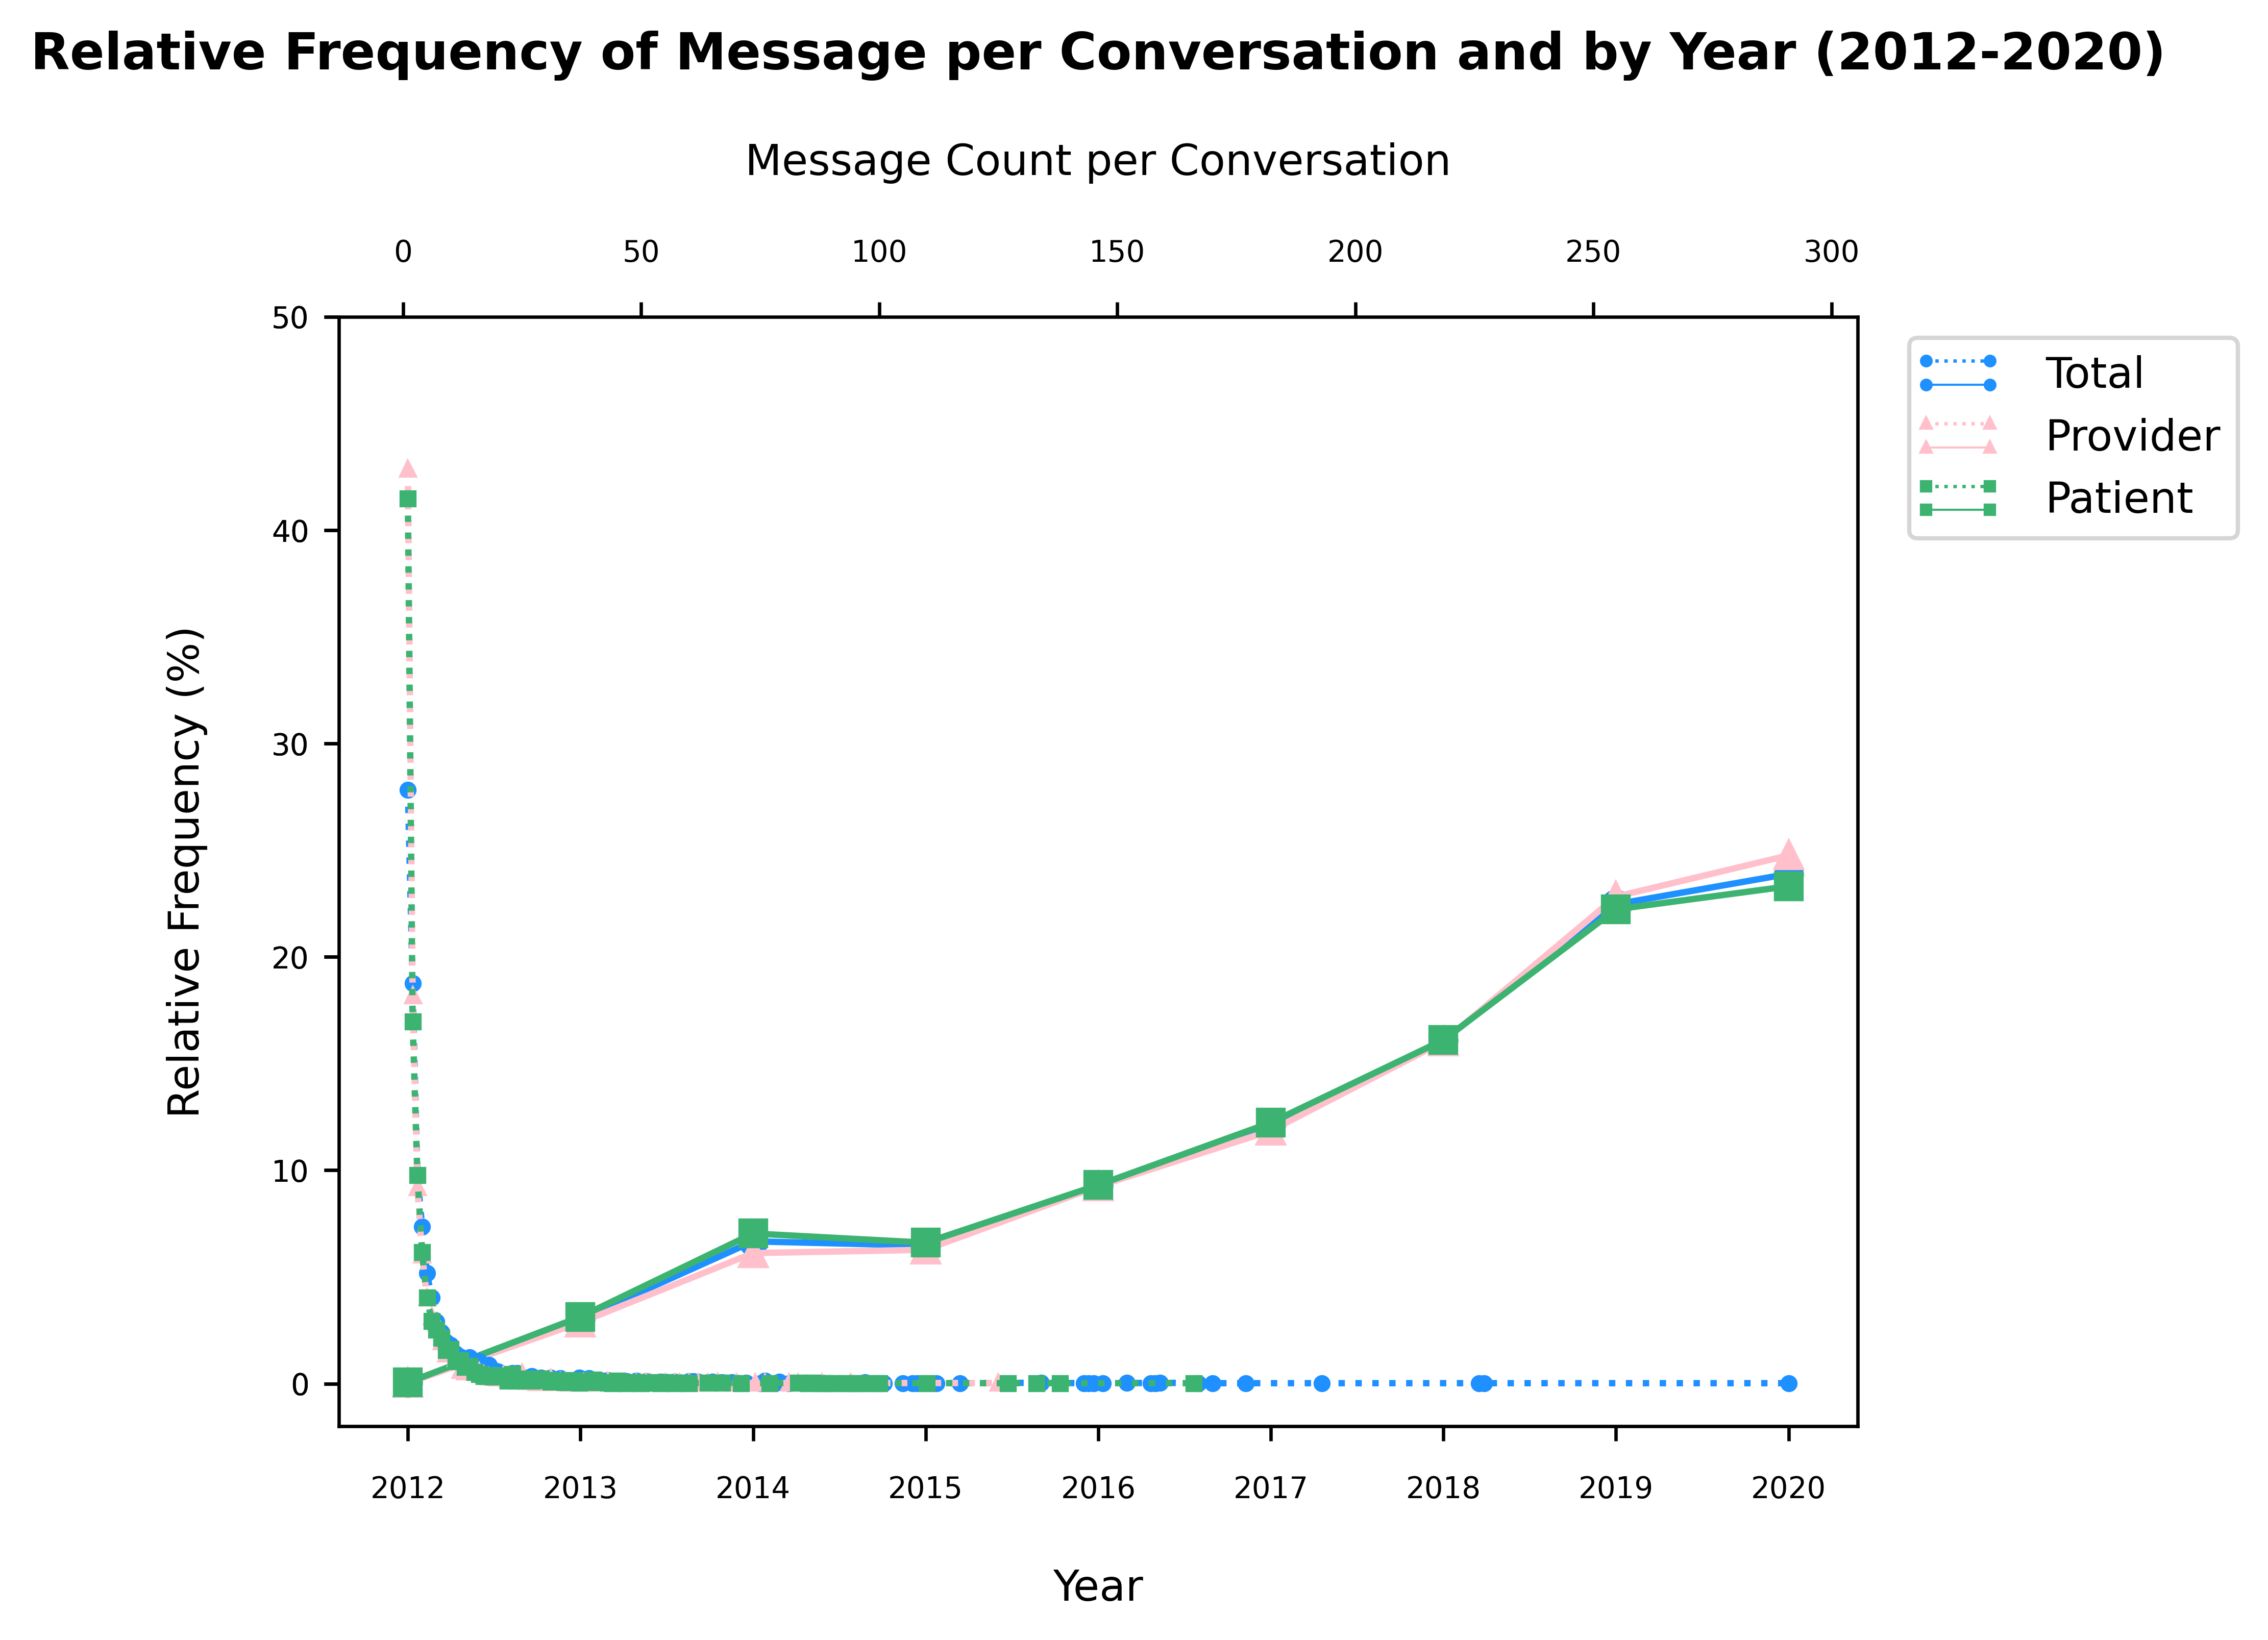

In [ ]:
# plot conversation and trend in a plot

from matplotlib.legend_handler import HandlerBase

rc('font',**{'family':'serif','serif':['Helvetica']})
rc('text', usetex=False)
rcParams['legend.numpoints'] = 1
rcParams['legend.scatterpoints'] = 0

fig = plt.figure(figsize = (6.4, 4.8), dpi=600)

ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

labels = ["Total", "Provider", "Patient"]
markers = ['o','^','s']
colors = ["dodgerblue", "pink", "mediumseagreen"]

for i, col in enumerate(frequency.columns[:-1]):
  ax1.plot(frequency['year'], frequency[col]*100, linestyle='solid', marker=markers[i], color=colors[i], label = labels[i])

for i, freq in enumerate(freq_msg_count):
  ax2.plot(freq*100, linestyle='dotted', marker=markers[i], markersize = 3, color=colors[i], label = labels[i])

ax1.set_xlabel("Year", labelpad=15)
ax1.set_ylabel("Relative Frequency (%)", labelpad=15)
ax1.set_ylim(-2, 50)

ax2.set_xlabel("Message Count per Conversation", labelpad=15)

ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top') 
ax2.set_ylim(-2, 50)

class AnyObjectHandler(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        l1 = plt.Line2D([0,15], [0.9*height,0.9*height],
                        linewidth = 0.8,linestyle = ":",
                        color=orig_handle[0], marker = orig_handle[1], markersize = 2)
        l2 = plt.Line2D([0,15], [0.1*height,0.1*height], 
                        linewidth = 0.5,linestyle = "-",
                        color=orig_handle[0], marker = orig_handle[1], markersize = 2)
        return [l1, l2]


plt.title("Relative Frequency of Message per Conversation and by Year (2012-2020)", y=1.2, fontsize=12, fontweight='bold')

plt.legend([("dodgerblue",'o'), ("pink","^"), ("mediumseagreen","s")], 
           ['Total', "Provider","Patient"],
           handler_map={tuple: AnyObjectHandler()},
           bbox_to_anchor=(1.02,1), loc="upper left",
           scatterpoints=0,numpoints=1) 


plt.show()

## Table One

Steps to create table one summary statistics

1. Use Python package Tableone to generate summary statistics of categorical variables (provider type, message content, year of message sent)

2. Save as CSV file "table1.csv"

3. Read in "table1.csv" as pandas dataframe

4. Add summary statistic of numerical variables (conversation count, message count per conversation, duration per conversation) to the previous table one

5. Beautify table one dataframe

6. Save as CSV file "tableone.csv"

In [16]:
# install package tableone for draw table one
pip install tableone

In [21]:
# tableone package tutorial: https://colab.research.google.com/github/tompollard/tableone/blob/master/tableone.ipynb
# Tom J Pollard, Alistair E W Johnson, Jesse D Raffa, Roger G Mark; tableone: An open source Python package for producing summary statistics for research papers, JAMIA Open, https://doi.org/10.1093/jamiaopen/ooy012

from tableone import TableOne

columns = ['PROV_TYPE',"MYC_MSG_TYP_DISPLAY",'MSG_SENDER','YEAR']

categorical = ['PROV_TYPE',"MYC_MSG_TYP_DISPLAY",'YEAR']

groupby = 'MSG_SENDER'

labels={'MSG_SENDER': 'Message Sender (Provider: 1; Patient: 0)', 
        "PROV_TYPE": "Provider Type", 
        "MYC_MSG_TYP_DISPLAY": "Message Content",
        'YEAR':"Year of Message Sent"
        }

order = {"PROV_TYPE": ["Physician", "Nurse Practitioner", "Registered Nurse", "Physician Assistant", "Fellow"],
         "MYC_MSG_TYP_DISPLAY": ["Patient Medical Advice Request","User Message","General Questionnaire Submission","Case Reminder Message"]
         }

summary_cate = TableOne(data2, columns=columns, categorical=categorical,
                   groupby=groupby, order=order, rename = labels)

summary_cate.to_csv('table1.csv')


In [22]:
# summary statistics of categorical variables
summary_cate

Grouped by Message Sender (Provider: 1; Patient: 0)                                          
                                                                                                         Missing       Overall             0             1
n                                                                                                                        38683         23168         15515
Provider Type, n (%)        Physician                                                                          0  31910 (82.5)  19317 (83.4)  12593 (81.2)
                            Nurse Practitioner                                                                     6022 (15.6)   3527 (15.2)   2495 (16.1)
                            Registered Nurse                                                                         626 (1.6)     246 (1.1)     380 (2.4)
                            Physician Assistant                                                                      123 (0.3)      78 (0.3)      45 (0.3)
                            Fellow                                                                                     2 (0.0)                     2 (0.0)
Message Content, n (%)      Patient Medical Advice Request                                                     0  37210 (96.2)  22685 (97.9)  14525 (93.6)
                            User Message                                                                            1468 (3.8)     479 (2.1)     989 (6.4)
                            General Questionnaire Submission                                                           4 (0.0)       4 (0.0)              
                            Case Reminder Message                                                                      1 (0.0)                     1 (0.0)
Year of Message Sent, n (%) 2012                                                                               0      16 (0.0)      12 (0.1)       4 (0.0)
                            2013                                                                                    1170 (3.0)     725 (3.1)     445 (2.9)
                            2014                                                                                    2579 (6.7)    1630 (7.0)     949 (6.1)
                            2015                                                                                    2503 (6.5)    1530 (6.6)     973 (6.3)
                            2016                                                                                    3591 (9.3)    2156 (9.3)    1435 (9.2)
                            2017                                                                                   4673 (12.1)   2834 (12.2)   1839 (11.9)
                            2018                                                                                   6219 (16.1)   3731 (16.1)   2488 (16.0)
                            2019                                                                                   8691 (22.5)   5150 (22.2)   3541 (22.8)
                            2020                                                                                   9241 (23.9)   5400 (23.3)   3841 (24.8)

In [62]:
# read in tableone csv file produced by Python Package Tableone
tableone = pd.read_csv('/content/table1.csv', 
                   encoding = "ISO-8859-1",
                   na_values = ['--', 'N/A', 'na','NaN'])

# drop 2 useless column: variable name and missing value
tableone = tableone.drop(columns=['Unnamed: 0','Grouped by Message Sender (Provider: 1; Patient: 0)'], index = [0])

# change column name of tableone
tableone.columns = ["Variable", "Total (n=1824)", "Patient (n=1622)", "Provider (n=202)"]

# rename Message Count of first row
tableone.loc[[1],['Variable']] = "Message Count (n)"

# add conversation count to tableone
conv_count = pd.DataFrame({"Variable":"Conversation Count, (n)", "Total (n=1824)": len(pd.unique(data2['CONVERSATION_ID'])), "Patient (n=1622)":"", "Provider (n=202)":""}, index=[2])
tableone = pd.concat([tableone.iloc[:1], conv_count, tableone.iloc[1:]]).reset_index(drop=True)

# add summary statistics of message count per conversation  to tableone
msg_count_conv = pd.DataFrame({"Variable":"Message Count per Conversation", "Total (n=1824)": "", "Patient (n=1622)":"", "Provider (n=202)":""}, index=[3])

tableone = pd.concat([tableone.iloc[:2], msg_count_conv, tableone.iloc[2:]]).reset_index(drop=True)
sum_msg_count_conv = sum_conv.loc[['Mean (SD)', 'Median (Range)'], ["msg_count_overall", "msg_count_pat", "msg_count_pro"]]
sum_msg_count_conv.insert(loc=0, column='Variable', value=sum_msg_count_conv.index)
sum_msg_count_conv.columns = ["Variable", "Total (n=1824)", "Patient (n=1622)", "Provider (n=202)"]
tableone = pd.concat([tableone.iloc[:3], sum_msg_count_conv, tableone.iloc[3:]]).reset_index(drop=True)


# add summary statistics of duration per conversation  to tableone
duration_conv = pd.DataFrame({"Variable":"Duration per Conversation (Days)", "Total (n=1824)": "", "Patient (n=1622)":"", "Provider (n=202)":""}, index=[6])
tableone = pd.concat([tableone.iloc[:5], duration_conv, tableone.iloc[5:]]).reset_index(drop=True)
sum_count_conv = sum_conv.loc[['Mean (SD)', 'Median (Range)'], ["duration"]] 
sum_count_conv.insert(loc=0, column='Variable', value=sum_count_conv.index) 
sum_count_conv.columns = ["Variable", "Total (n=1824)"]
tableone = pd.concat([tableone.iloc[:6], sum_count_conv, tableone.iloc[6:]]).reset_index(drop=True)

# add summary header of statistics of provider type to tableone
pro_type = pd.DataFrame({"Variable":"Provider Type, n(%)", "Total (n=1824)": "", "Patient (n=1622)":"", "Provider (n=202)":""}, index=[9])
tableone = pd.concat([tableone.iloc[:8], pro_type, tableone.iloc[8:]]).reset_index(drop=True)

# add summary header of statistics of message content to tableone
msg_content = pd.DataFrame({"Variable":"Message Content, n(%)", "Total (n=1824)": "", "Patient (n=1622)":"", "Provider (n=202)":""}, index=[15])
tableone = pd.concat([tableone.iloc[:14], msg_content, tableone.iloc[14:]]).reset_index(drop=True)

# add header of summary statistics of year of message sent to tableone
year = pd.DataFrame({"Variable":"Year of Message Sent, n(%)", "Total (n=1824)": "", "Patient (n=1622)":"", "Provider (n=202)":""}, index=[20])
tableone = pd.concat([tableone.iloc[:19], year, tableone.iloc[19:]]).reset_index(drop=True) 

# reorder the column of tableone
tableone = tableone[["Variable", "Provider (n=202)","Patient (n=1622)","Total (n=1824)"]]

# reorder the column of tableone
tableone = tableone[["Variable", "Provider (n=202)","Patient (n=1622)","Total (n=1824)"]]

# set NA in "conversation count" and "duration per Conversation" as "-"
tableone.iloc[ 1, 1:3]  = "-"
tableone.iloc[ 6:8, 1:3]  = "-"

# set NA as "0 (0.0)"
tableone = tableone.fillna("0 (0.0)")

# save dataframe table one as csv file
tableone.to_csv("tableone.csv")

In [61]:
tableone

,Variable,Provider (n=202),Patient (n=1622),Total (n=1824)
0,Message Count (n),15515,23168,38683
1,"Conversation Count, (n)",-,-,4901
2,Message Count per Conversation,,,
3,Mean (SD),4.3 (7.5),5.1 (9.8),7.9 (16.1)
4,Median (Range),"2.0 (1.0, 125.0)","2.0 (1.0, 166.0)","3.0 (1.0, 291.0)"
5,Duration per Conversation (Days),,,
6,Mean (SD),-,-,108.0 (275.0)
7,Median (Range),-,-,"2.0 (0.0, 2894.0)"
8,"Provider Type, n(%)",,,
9,Physician,12593 (81.2),19317 (83.4),31910 (82.5)


## Provider Type

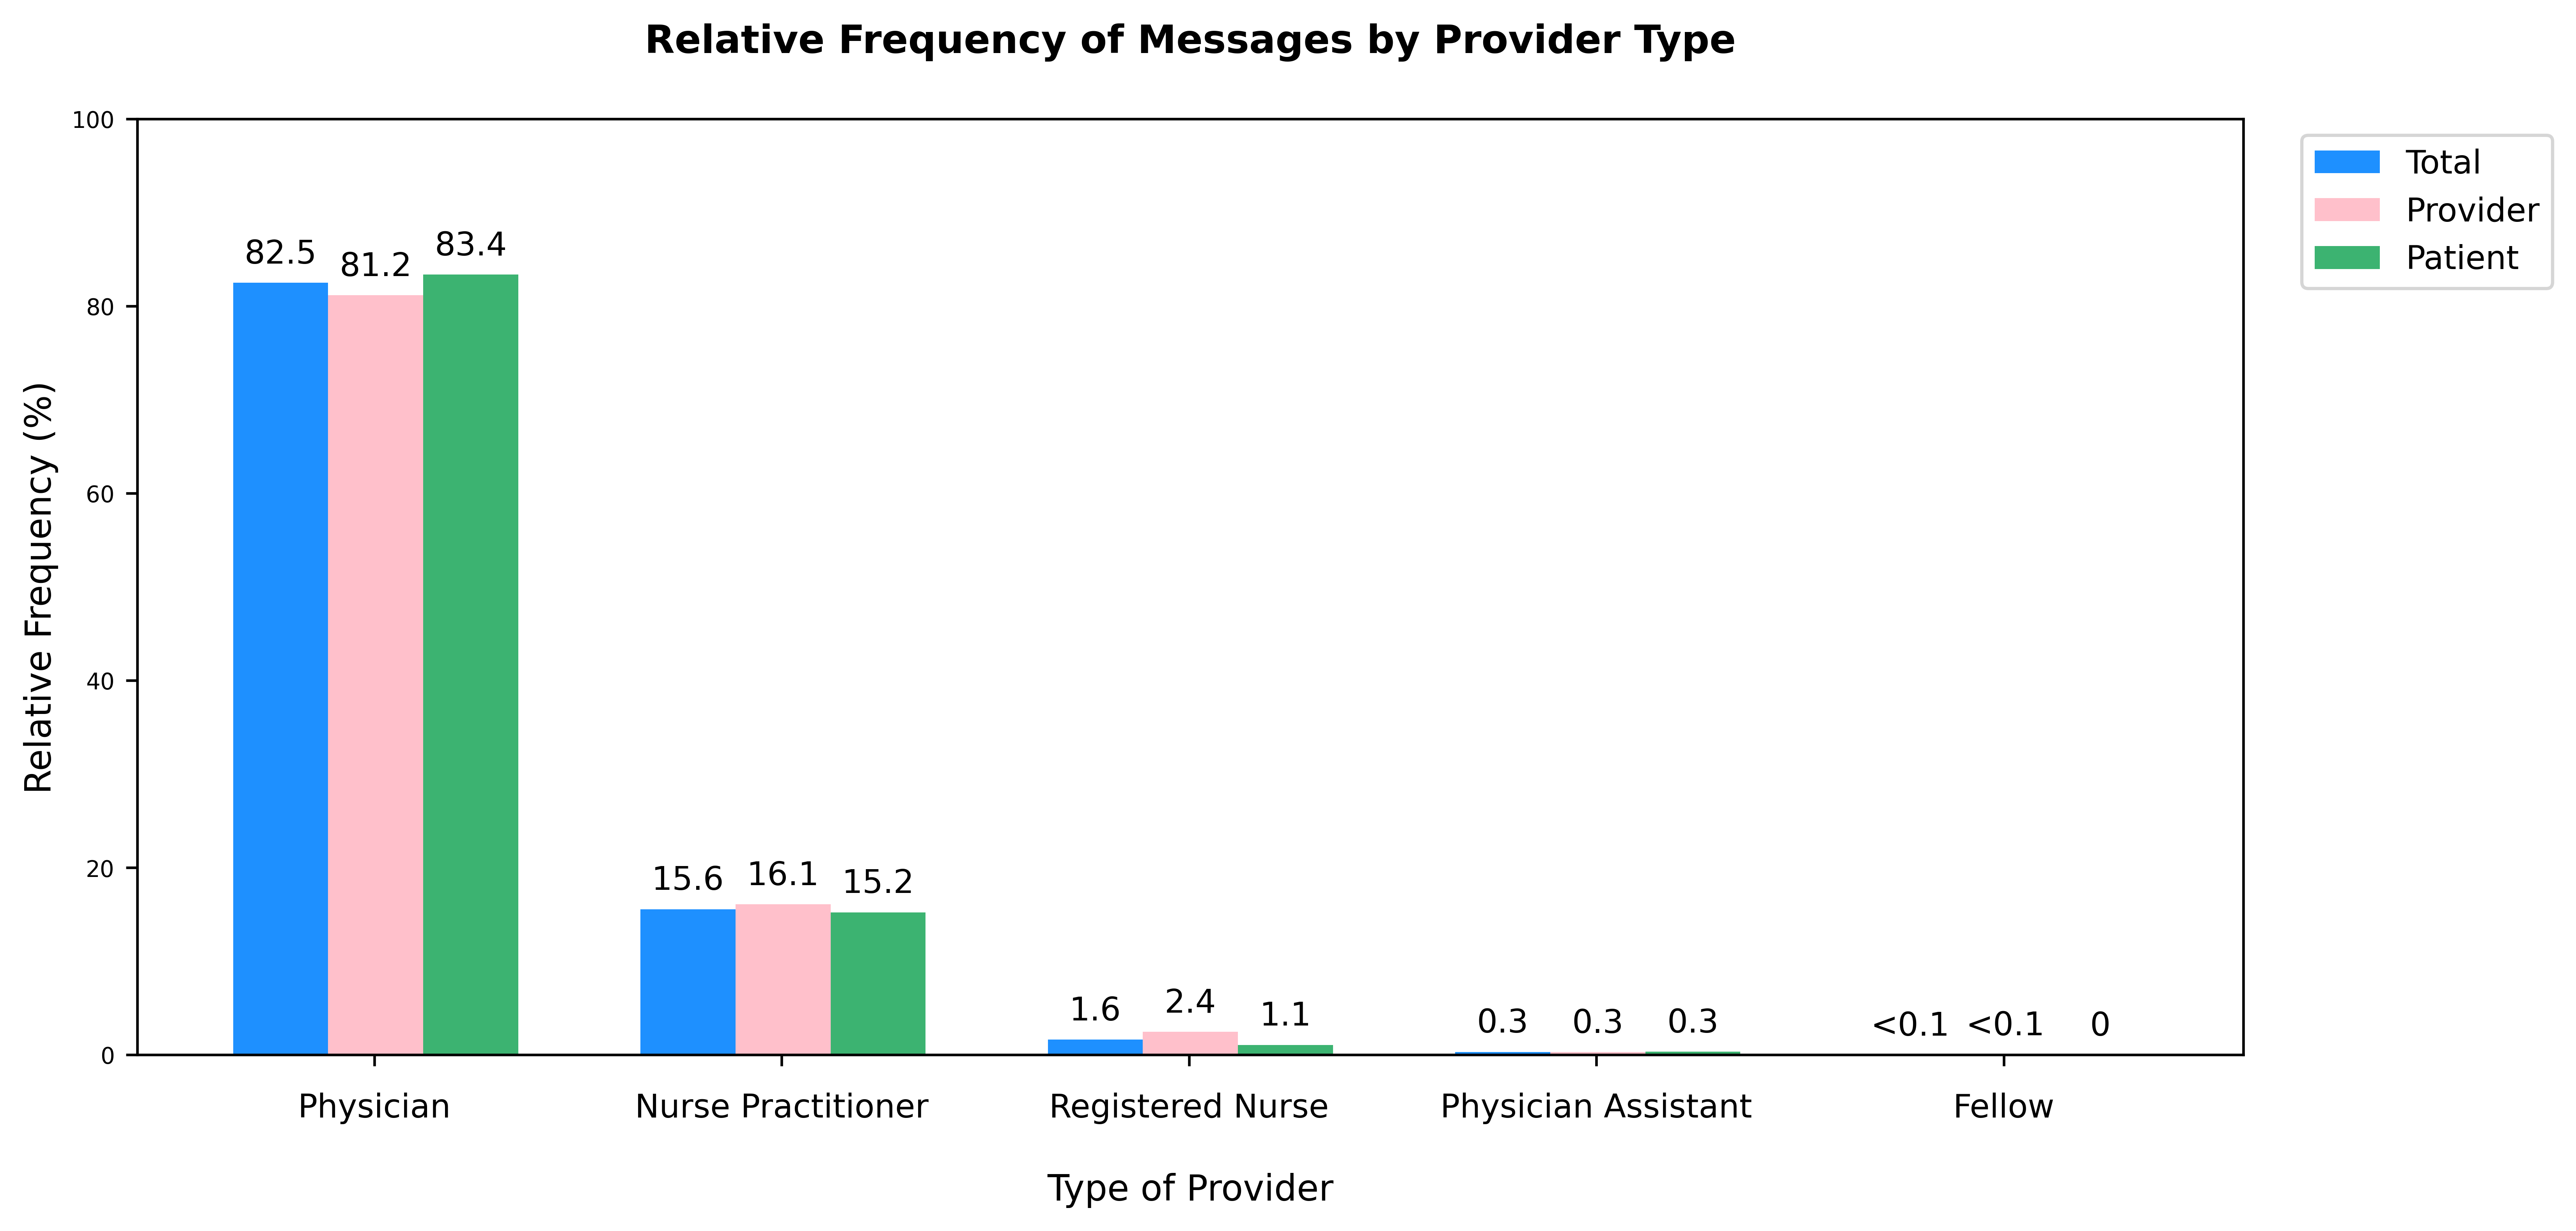

In [ ]:
# plot Relative Frequency of Provider Type of Messages
xlabels = ["Physician", "Nurse Practitioner", "Registered Nurse", "Physician Assistant", "Fellow"]

freq_overall = 100*data2['PROV_TYPE'].value_counts(normalize=True)

freq_pro = 100*data2.loc[data2['TO_PAT_YN']=='Y']['PROV_TYPE'].value_counts(normalize=True)

freq_pat = 100*data2.loc[data2['TO_PAT_YN']=='N']['PROV_TYPE'].value_counts(normalize=True)

freq = [freq_overall, freq_pro, freq_pat]

labels = ["Total", "Provider", "Patient"]

colors = ["dodgerblue", "pink", "mediumseagreen"]

rc('font',**{'family':'serif','serif':['Helvetica']})
rc('text', usetex=False)
rcParams['xtick.major.pad']='8'

plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

fig = plt.figure(figsize = (6,5), dpi=600) 

left, bottom, width, height = 0.1,0.1,1.5,0.8

ax = fig.add_axes([left, bottom, width, height])

labeld_bar(ax, xlabels, freq, labels, colors)

ax.set_xlabel('Type of Provider',fontsize=11, labelpad=15)

ax.set_ylabel("Relative Frequency (%)", fontsize=11)

ax.set_ylim(0, 100)

ax.set_title("Relative Frequency of Messages by Provider Type", y=1.05, fontsize=12, fontweight='bold')

ax.legend(bbox_to_anchor=(1.02,1), loc="upper left") 

plt.show()



In [ ]:
# what is the distribution of patients' messages by type of providers?
# most of them are physician (83.4%)
data2['PROV_TYPE'].value_counts(normalize=True) 

Physician              0.824910
Nurse Practitioner     0.155676
Registered Nurse       0.016183
Physician Assistant    0.003180
Fellow                 0.000052
Name: PROV_TYPE, dtype: float64

In [ ]:
# what is the distribution of providers' messages by type of providers?
# most of them are physician (81.2%)
data2[data2['TO_PAT_YN']=='Y']['PROV_TYPE'].value_counts(normalize=True) 

Physician              0.811666
Nurse Practitioner     0.160812
Registered Nurse       0.024492
Physician Assistant    0.002900
Fellow                 0.000129
Name: PROV_TYPE, dtype: float64

In [ ]:
# what is the distribution of patients' messages by type of providers?
# most of them are physician (83.4%)
data2[data2['TO_PAT_YN']=='N']['PROV_TYPE'].value_counts(normalize=True) 

Physician              0.833779
Nurse Practitioner     0.152236
Registered Nurse       0.010618
Physician Assistant    0.003367
Fellow                 0.000000
Name: PROV_TYPE, dtype: float64

## Message Content

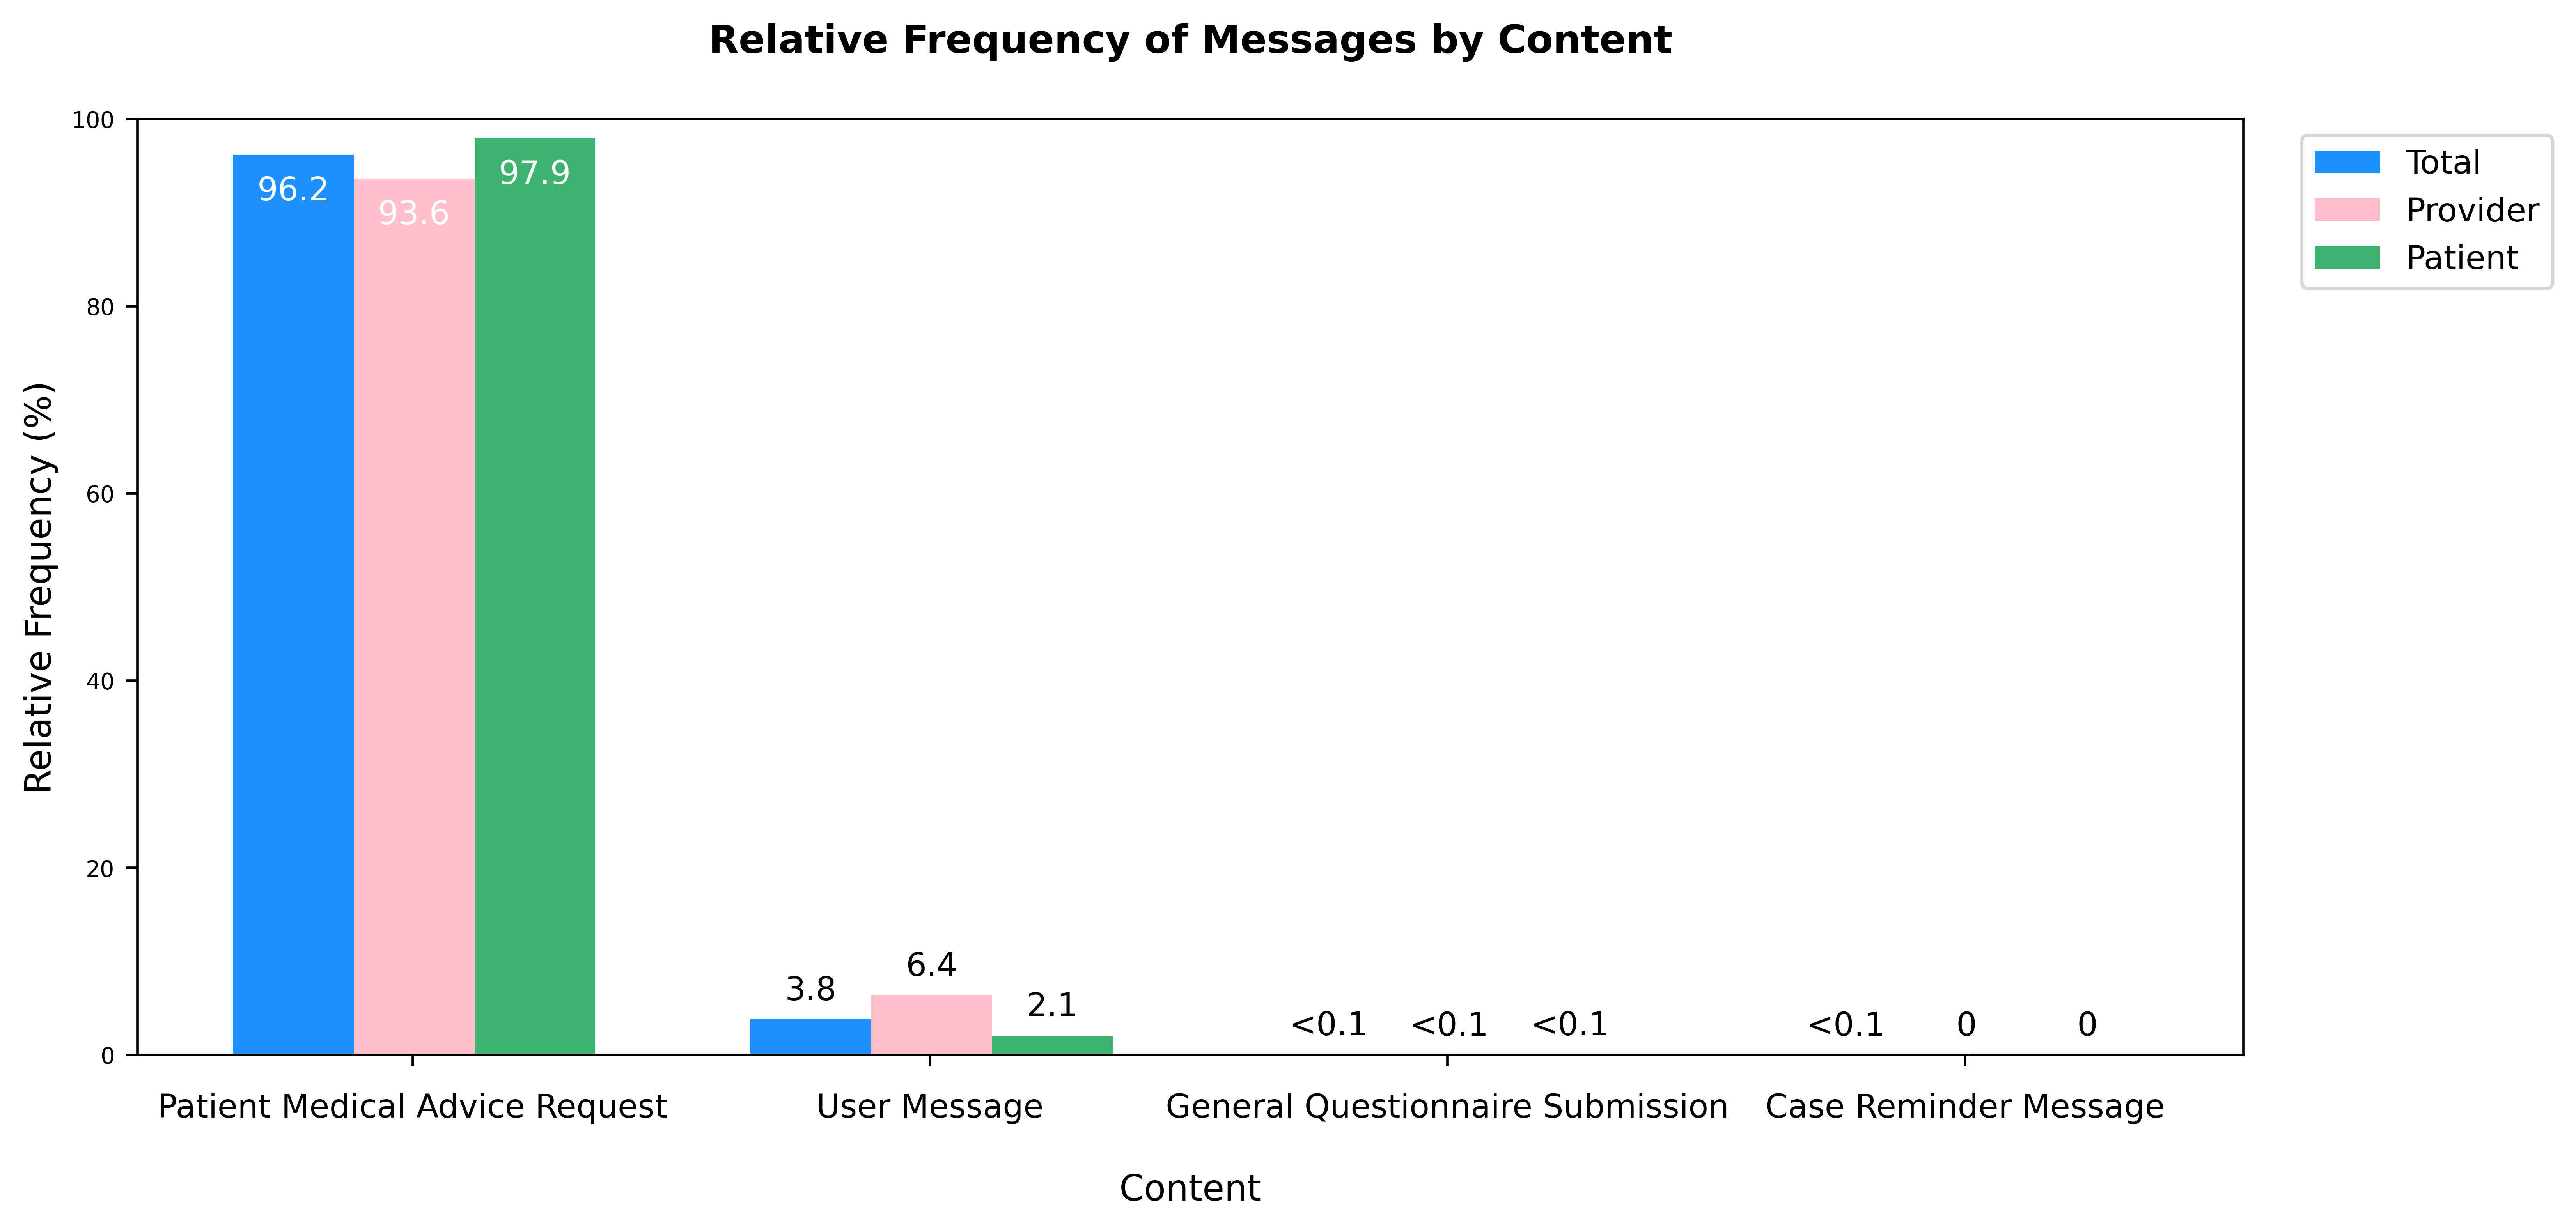

In [ ]:
# plot Relative Frequency of Message content Type (Total, by provider and patient)
freq_overall = 100*data2['MYC_MSG_TYP_DISPLAY'].value_counts(normalize=True)

freq_pro = 100*data2.loc[data2['TO_PAT_YN']=='Y']['MYC_MSG_TYP_DISPLAY'].value_counts(normalize=True)

freq_pat = 100*data2.loc[data2['TO_PAT_YN']=='N']['MYC_MSG_TYP_DISPLAY'].value_counts(normalize=True)

freq = [freq_overall, freq_pro, freq_pat]

labels = ["Total", "Provider", "Patient"]

colors = ["dodgerblue", "pink", "mediumseagreen"]

xlabels = ["Patient Medical Advice Request","User Message","General Questionnaire Submission","Case Reminder Message"]

rc('font',**{'family':'serif','serif':['Helvetica']})
rc('text', usetex=False)
rcParams['xtick.major.pad']='8'

plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

fig = plt.figure(figsize = (6,5), dpi=600) 

left, bottom, width, height = 0.1,0.1,1.5,0.8

ax = fig.add_axes([left, bottom, width, height])

labeld_bar(ax, xlabels, freq, labels, colors)

ax.set_xlabel('Content',fontsize=11, labelpad=15)

ax.set_ylabel("Relative Frequency (%)", fontsize=11)

ax.set_ylim(0, 100)

ax.set_title("Relative Frequency of Messages by Content", y=1.05, fontsize=12, fontweight='bold')

ax.legend(bbox_to_anchor=(1.02,1), loc="upper left") 

plt.show()



In [ ]:
# what is the distribution of type of messages content?
# most are Patient Medical Advice Request (96.1%)
data2[data2['MYC_MSG_TYP_DISPLAY'].value_counts(normalize=True) 

SyntaxError: ignored

In [ ]:
# what is the distribution of type of providers' messages content?
# most are Patient Medical Advice Request (93.6%)
data2[data2['TO_PAT_YN']=='Y']['MYC_MSG_TYP_DISPLAY'].value_counts(normalize=True) 

Patient Medical Advice Request      0.936191
User Message                        0.063745
Case Reminder Message               0.000064
General Questionnaire Submission    0.000000
Name: MYC_MSG_TYP_DISPLAY, dtype: float64

In [ ]:
# what is the distribution of type of patients' messages content?
# most are Patient Medical Advice Request (97.9%)
data2[data2['TO_PAT_YN']=='N']['MYC_MSG_TYP_DISPLAY'].value_counts(normalize=True) 

Patient Medical Advice Request      0.979152
User Message                        0.020675
General Questionnaire Submission    0.000173
Case Reminder Message               0.000000
Name: MYC_MSG_TYP_DISPLAY, dtype: float64

In [ ]:
# what is the distribution of messages sent by patients or providers?
# Patients sent more messages than providers (59.9% vs. 40.1%)
data2['TO_PAT_YN'].value_counts(normalize=True) 

N    0.598919
Y    0.401081
Name: TO_PAT_YN, dtype: float64

In [ ]:
# How many unique messages?
# all messages id are unique: 38683 in total
len(pd.unique(data2['MESSAGE_ID']))

38683

In [ ]:
# How many unique index?
# all INDEX are unique: 38683 in total
len(pd.unique(data2['INDEX']))

38683

# Data Preprocessing

In [ ]:
import nltk
nltk.download('punkt')
import itertools

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Frequencies of Emotional Terms Overtime

In [ ]:
data_drop_duplicated['YEAR'] = data_drop_duplicated['DATE_OF_MESSAGE'].dt.year

In [ ]:
provider = data_drop_duplicated[data_drop_duplicated['TO_PAT_YN']=="Y"]

In [ ]:
provider.head()

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,PAT_ID_NEW,CONVERSATION_ID,YEAR
5,6075,2015-10-06,Physician,Patient Message,Patient Medical Advice Request,Y,Y,3274053,1,15,Hi can eat anything you want- just chew it up ...,371,2,2015
7,5328,2015-11-09,Physician,Patient Message,Patient Medical Advice Request,Y,Y,3543664,1,17,We are in the process of sending the refill to...,371,3,2015
9,6075,2016-12-06,Physician,Patient Message,Patient Medical Advice Request,Y,Y,7279087,1,19,Hi That sounds reasonable I would do the colon...,371,4,2016
13,5328,2017-07-31,Physician,Patient Message,Patient Medical Advice Request,Y,Y,10180725,1,23,Dr's note says to follow up with Dr,371,5,2017
15,5328,2017-07-31,Physician,Patient Message,Patient Medical Advice Request,Y,Y,10181144,1,25,Dr's office phone number is 203-863-3773 We do...,371,5,2017


In [ ]:
data.drop('PAT_ID_NEW',axis=1).head()

,ENC_PROV_ID,DATE_OF_MESSAGE,PROV_TYPE,ENC_TYPE_DISPLAY,MYC_MSG_TYP_DISPLAY,REPLY_YN,TO_PAT_YN,MESSAGE_ID,MESSAGE_SUB_ID,INDEX,MESSAGE_CL,CONVERSATION_ID
0,5741,2015-06-10,Physician,Patient Message,Patient Medical Advice Request,N,N,2415358,1,1,I just refilled my last refill of thyroid med ...,1
1,6075,2015-02-25,Physician,Patient Message,Patient Medical Advice Request,N,N,1866181,1,11,Has the fleet enema and magnesium citrate been...,2
2,6075,2015-03-06,Physician,Patient Message,Patient Medical Advice Request,N,N,1908367,1,12,Dr Is there any chance I could be given a summ...,2
3,6075,2015-07-10,Physician,Patient Message,Patient Medical Advice Request,N,N,2578822,1,13,After surgery will this be an in patient or ou...,2
4,6075,2015-10-06,Physician,Patient Message,Patient Medical Advice Request,N,N,3269497,1,14,Dr I was wondering if I might start to try som...,2


In [ ]:
prov_2012 = provider[provider['YEAR']==2012]
prov_2013 = provider[provider['YEAR']==2013]
prov_2014 = provider[provider['YEAR']==2014]
prov_2015 = provider[provider['YEAR']==2015]
prov_2016 = provider[provider['YEAR']==2016]
prov_2017 = provider[provider['YEAR']==2017]
prov_2018 = provider[provider['YEAR']==2018]
prov_2019 = provider[provider['YEAR']==2019]
prov_2020 = provider[provider['YEAR']==2020]

In [ ]:
df_12 = prov_2012['MESSAGE_CL'].values
df_13 = prov_2013['MESSAGE_CL'].values
df_14 = prov_2014['MESSAGE_CL'].values
df_15 = prov_2015['MESSAGE_CL'].values
df_16 = prov_2016['MESSAGE_CL'].values
df_17 = prov_2017['MESSAGE_CL'].values
df_18 = prov_2018['MESSAGE_CL'].values
df_19 = prov_2019['MESSAGE_CL'].values
df_20 = prov_2020['MESSAGE_CL'].values

In [ ]:
df_12

array(['Hi Mr Your blood work was faxed to you and Dr today Please let us know if you have any more questions',
       'Hi Mr I spoke with Dr and she said the fatigue may be from the Lupron but the urinary symptoms are not She suggested you might check with your urologist You have an appointment Nov 7 and you can have the labs added for these labs you need to be fasting six hours',
       "Thank you Mr Do n't worry you are not bothering us at all:) We are sorry for the delay in response I need to give every message to Dr to look at first before I can reply to you I am hoping she has been replying to you directly If not let me know and I will ask her in person the answers to your previous questions Thank you for your patience",
       'Your next appointment is Wednesday November 7 at 11:30am'],
      dtype=object)

In [ ]:
token_12=[nltk.word_tokenize(row) for row in df_12]
token_13=[nltk.word_tokenize(row) for row in df_13]
token_14=[nltk.word_tokenize(row) for row in df_14]
token_15=[nltk.word_tokenize(row) for row in df_15]
token_16=[nltk.word_tokenize(row) for row in df_16]
token_17=[nltk.word_tokenize(row) for row in df_17]
token_18=[nltk.word_tokenize(row) for row in df_18]
token_19=[nltk.word_tokenize(row) for row in df_19]
token_20=[nltk.word_tokenize(row) for row in df_20]

In [ ]:
token_12

[['Hi',
  'Mr',
  'Your',
  'blood',
  'work',
  'was',
  'faxed',
  'to',
  'you',
  'and',
  'Dr',
  'today',
  'Please',
  'let',
  'us',
  'know',
  'if',
  'you',
  'have',
  'any',
  'more',
  'questions'],
 ['Hi',
  'Mr',
  'I',
  'spoke',
  'with',
  'Dr',
  'and',
  'she',
  'said',
  'the',
  'fatigue',
  'may',
  'be',
  'from',
  'the',
  'Lupron',
  'but',
  'the',
  'urinary',
  'symptoms',
  'are',
  'not',
  'She',
  'suggested',
  'you',
  'might',
  'check',
  'with',
  'your',
  'urologist',
  'You',
  'have',
  'an',
  'appointment',
  'Nov',
  '7',
  'and',
  'you',
  'can',
  'have',
  'the',
  'labs',
  'added',
  'for',
  'these',
  'labs',
  'you',
  'need',
  'to',
  'be',
  'fasting',
  'six',
  'hours'],
 ['Thank',
  'you',
  'Mr',
  'Do',
  "n't",
  'worry',
  'you',
  'are',
  'not',
  'bothering',
  'us',
  'at',
  'all',
  ':',
  ')',
  'We',
  'are',
  'sorry',
  'for',
  'the',
  'delay',
  'in',
  'response',
  'I',
  'need',
  'to',
  'give',
  'ever

In [ ]:
tokens_all_12 = list(itertools.chain.from_iterable(token_12))
tokens_all_13 = list(itertools.chain.from_iterable(token_13))
tokens_all_14= list(itertools.chain.from_iterable(token_14))
tokens_all_15 = list(itertools.chain.from_iterable(token_15))
tokens_all_16 = list(itertools.chain.from_iterable(token_16))
tokens_all_17 = list(itertools.chain.from_iterable(token_17))
tokens_all_18 = list(itertools.chain.from_iterable(token_18))
tokens_all_19 = list(itertools.chain.from_iterable(token_19))
tokens_all_20 = list(itertools.chain.from_iterable(token_20))

In [ ]:
#make all words lowercase
final_12 =[t.lower() for t in tokens_all_12]
final_13 =[t.lower() for t in tokens_all_13]
final_14 =[t.lower() for t in tokens_all_14]
final_15 =[t.lower() for t in tokens_all_15]
final_16 =[t.lower() for t in tokens_all_16]
final_17 =[t.lower() for t in tokens_all_17]
final_18 =[t.lower() for t in tokens_all_18]
final_19 =[t.lower() for t in tokens_all_19]
final_20 =[t.lower() for t in tokens_all_20]

In [ ]:
final_12

['hi',
 'mr',
 'your',
 'blood',
 'work',
 'was',
 'faxed',
 'to',
 'you',
 'and',
 'dr',
 'today',
 'please',
 'let',
 'us',
 'know',
 'if',
 'you',
 'have',
 'any',
 'more',
 'questions',
 'hi',
 'mr',
 'i',
 'spoke',
 'with',
 'dr',
 'and',
 'she',
 'said',
 'the',
 'fatigue',
 'may',
 'be',
 'from',
 'the',
 'lupron',
 'but',
 'the',
 'urinary',
 'symptoms',
 'are',
 'not',
 'she',
 'suggested',
 'you',
 'might',
 'check',
 'with',
 'your',
 'urologist',
 'you',
 'have',
 'an',
 'appointment',
 'nov',
 '7',
 'and',
 'you',
 'can',
 'have',
 'the',
 'labs',
 'added',
 'for',
 'these',
 'labs',
 'you',
 'need',
 'to',
 'be',
 'fasting',
 'six',
 'hours',
 'thank',
 'you',
 'mr',
 'do',
 "n't",
 'worry',
 'you',
 'are',
 'not',
 'bothering',
 'us',
 'at',
 'all',
 ':',
 ')',
 'we',
 'are',
 'sorry',
 'for',
 'the',
 'delay',
 'in',
 'response',
 'i',
 'need',
 'to',
 'give',
 'every',
 'message',
 'to',
 'dr',
 'to',
 'look',
 'at',
 'first',
 'before',
 'i',
 'can',
 'reply',
 'to',


### Stemming

In [ ]:
stemmed_12 = [nltk.PorterStemmer().stem(t) for t in final_12]
stemmed_13 = [nltk.PorterStemmer().stem(t) for t in final_13]
stemmed_14 = [nltk.PorterStemmer().stem(t) for t in final_14]
stemmed_15 = [nltk.PorterStemmer().stem(t) for t in final_15]
stemmed_16 = [nltk.PorterStemmer().stem(t) for t in final_16]
stemmed_17 = [nltk.PorterStemmer().stem(t) for t in final_17]
stemmed_18 = [nltk.PorterStemmer().stem(t) for t in final_18]
stemmed_19 = [nltk.PorterStemmer().stem(t) for t in final_19]
stemmed_20 = [nltk.PorterStemmer().stem(t) for t in final_20]

### Lemmatization

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
lem_12 = [WordNetLemmatizer().lemmatize(t,pos='v') for t in final_12]
lem_13 = [WordNetLemmatizer().lemmatize(t,pos='v') for t in final_13]
lem_14 = [WordNetLemmatizer().lemmatize(t,pos='v') for t in final_14]
lem_15 = [WordNetLemmatizer().lemmatize(t,pos='v') for t in final_15]
lem_16 = [WordNetLemmatizer().lemmatize(t,pos='v') for t in final_16]
lem_17 = [WordNetLemmatizer().lemmatize(t,pos='v') for t in final_17]
lem_18 = [WordNetLemmatizer().lemmatize(t,pos='v') for t in final_18]
lem_19 = [WordNetLemmatizer().lemmatize(t,pos='v') for t in final_19]
lem_20 = [WordNetLemmatizer().lemmatize(t,pos='v') for t in final_20]

In [ ]:
nltk.PorterStemmer().stem('was')

'wa'

In [ ]:
WordNetLemmatizer().lemmatize('wondering',pos='v')

'wonder'

In [ ]:
print(stemmed_12)

['hi', 'mr', 'your', 'blood', 'work', 'wa', 'fax', 'to', 'you', 'and', 'dr', 'today', 'pleas', 'let', 'us', 'know', 'if', 'you', 'have', 'ani', 'more', 'question', 'hi', 'mr', 'i', 'spoke', 'with', 'dr', 'and', 'she', 'said', 'the', 'fatigu', 'may', 'be', 'from', 'the', 'lupron', 'but', 'the', 'urinari', 'symptom', 'are', 'not', 'she', 'suggest', 'you', 'might', 'check', 'with', 'your', 'urologist', 'you', 'have', 'an', 'appoint', 'nov', '7', 'and', 'you', 'can', 'have', 'the', 'lab', 'ad', 'for', 'these', 'lab', 'you', 'need', 'to', 'be', 'fast', 'six', 'hour', 'thank', 'you', 'mr', 'do', "n't", 'worri', 'you', 'are', 'not', 'bother', 'us', 'at', 'all', ':', ')', 'we', 'are', 'sorri', 'for', 'the', 'delay', 'in', 'respons', 'i', 'need', 'to', 'give', 'everi', 'messag', 'to', 'dr', 'to', 'look', 'at', 'first', 'befor', 'i', 'can', 'repli', 'to', 'you', 'i', 'am', 'hope', 'she', 'ha', 'been', 'repli', 'to', 'you', 'directli', 'if', 'not', 'let', 'me', 'know', 'and', 'i', 'will', 'ask', 

In [ ]:
print(lem_12)

['hi', 'mr', 'your', 'blood', 'work', 'be', 'fax', 'to', 'you', 'and', 'dr', 'today', 'please', 'let', 'us', 'know', 'if', 'you', 'have', 'any', 'more', 'question', 'hi', 'mr', 'i', 'speak', 'with', 'dr', 'and', 'she', 'say', 'the', 'fatigue', 'may', 'be', 'from', 'the', 'lupron', 'but', 'the', 'urinary', 'symptoms', 'be', 'not', 'she', 'suggest', 'you', 'might', 'check', 'with', 'your', 'urologist', 'you', 'have', 'an', 'appointment', 'nov', '7', 'and', 'you', 'can', 'have', 'the', 'labs', 'add', 'for', 'these', 'labs', 'you', 'need', 'to', 'be', 'fast', 'six', 'hours', 'thank', 'you', 'mr', 'do', "n't", 'worry', 'you', 'be', 'not', 'bother', 'us', 'at', 'all', ':', ')', 'we', 'be', 'sorry', 'for', 'the', 'delay', 'in', 'response', 'i', 'need', 'to', 'give', 'every', 'message', 'to', 'dr', 'to', 'look', 'at', 'first', 'before', 'i', 'can', 'reply', 'to', 'you', 'i', 'be', 'hop', 'she', 'have', 'be', 'reply', 'to', 'you', 'directly', 'if', 'not', 'let', 'me', 'know', 'and', 'i', 'will'

## Frequency By Different Providers

### Creating Dataframe for Each Year By Provider

In [ ]:
phys_12 = prov_2012[prov_2012['PROV_TYPE']=='Physician']
np_12 = prov_2012[prov_2012['PROV_TYPE']=='Nurse Practitioner']

In [ ]:
phys_13 = prov_2013[prov_2013['PROV_TYPE']=='Physician']
np_13 = prov_2013[prov_2013['PROV_TYPE']=='Nurse Practitioner']

In [ ]:
phys_14 = prov_2014[prov_2014['PROV_TYPE']=='Physician']
np_14 = prov_2014[prov_2014['PROV_TYPE']=='Nurse Practitioner']

In [ ]:
phys_15 = prov_2015[prov_2015['PROV_TYPE']=='Physician']
pa_15 = prov_2015[prov_2015['PROV_TYPE']=='Physician Assistant']
fellow_15 = prov_2015[prov_2015['PROV_TYPE']=='Fellow']
np_15 = prov_2015[prov_2015['PROV_TYPE']=='Nurse Practitioner']
reg_nurse_15 = prov_2015[prov_2015['PROV_TYPE']=='Registered Nurse']

In [ ]:
phys_16 = prov_2016[prov_2016['PROV_TYPE']=='Physician']
np_16 = prov_2016[prov_2016['PROV_TYPE']=='Nurse Practitioner']

In [ ]:
phys_17 = prov_2017[prov_2017['PROV_TYPE']=='Physician']
np_17 = prov_2017[prov_2017['PROV_TYPE']=='Nurse Practitioner']

In [ ]:
phys_18 = prov_2018[prov_2018['PROV_TYPE']=='Physician']
np_18 = prov_2018[prov_2018['PROV_TYPE']=='Nurse Practitioner']

In [ ]:
phys_19 = prov_2019[prov_2019['PROV_TYPE']=='Physician']
np_19 = prov_2019[prov_2019['PROV_TYPE']=='Nurse Practitioner']

In [ ]:
phys_20 = prov_2020[prov_2020['PROV_TYPE']=='Physician']
np_20 = prov_2020[prov_2020['PROV_TYPE']=='Nurse Practitioner']

### Collecting Message Content

In [ ]:
phys_12_msg = phys_12['MESSAGE_CL'].values
np_12_msg = np_12['MESSAGE_CL'].values

In [ ]:
phys_13_msg = phys_13['MESSAGE_CL'].values
np_13_msg = np_13['MESSAGE_CL'].values

In [ ]:
phys_14_msg = phys_14['MESSAGE_CL'].values
np_14_msg = np_14['MESSAGE_CL'].values

In [ ]:
phys_15_msg = phys_15['MESSAGE_CL'].values
pa_15_msg = pa_15['MESSAGE_CL'].values
np_15_msg = np_15['MESSAGE_CL'].values
reg_nurse_15_msg = reg_nurse_15['MESSAGE_CL'].values

In [ ]:
phys_16_msg = phys_16['MESSAGE_CL'].values
np_16_msg = np_16['MESSAGE_CL'].values

In [ ]:
phys_17_msg = phys_17['MESSAGE_CL'].values
np_17_msg = np_17['MESSAGE_CL'].values

In [ ]:
phys_18_msg = phys_18['MESSAGE_CL'].values
np_18_msg = np_18['MESSAGE_CL'].values

In [ ]:
phys_19_msg = phys_19['MESSAGE_CL'].values
np_19_msg = np_19['MESSAGE_CL'].values

In [ ]:
phys_20_msg = phys_20['MESSAGE_CL'].values
np_20_msg = np_20['MESSAGE_CL'].values

### Tokenize

In [ ]:
tok_phys12 = [nltk.word_tokenize(row) for row in phys_12_msg]
tok_np12 = [nltk.word_tokenize(row) for row in np_12_msg]

In [ ]:
tok_phys13 = [nltk.word_tokenize(row) for row in phys_13_msg]
tok_np13 = [nltk.word_tokenize(row) for row in np_13_msg]

In [ ]:
tok_phys14 = [nltk.word_tokenize(row) for row in phys_14_msg]
tok_np14 = [nltk.word_tokenize(row) for row in np_14_msg]

In [ ]:
tok_phys15 = [nltk.word_tokenize(row) for row in phys_15_msg]
tok_pa15 = [nltk.word_tokenize(row) for row in pa_15_msg]
tok_np15 = [nltk.word_tokenize(row) for row in np_15_msg]
tok_rn15 = [nltk.word_tokenize(row) for row in reg_nurse_15_msg]

In [ ]:
tok_phys16 = [nltk.word_tokenize(row) for row in phys_16_msg]
tok_np16 = [nltk.word_tokenize(row) for row in np_16_msg]

In [ ]:
tok_phys17 = [nltk.word_tokenize(row) for row in phys_17_msg]
tok_np17 = [nltk.word_tokenize(row) for row in np_17_msg]

In [ ]:
tok_phys18 = [nltk.word_tokenize(row) for row in phys_18_msg]
tok_np18 = [nltk.word_tokenize(row) for row in np_18_msg]

In [ ]:
tok_phys19 = [nltk.word_tokenize(row) for row in phys_19_msg]
tok_np19 = [nltk.word_tokenize(row) for row in np_19_msg]

In [ ]:
tok_phys20 = [nltk.word_tokenize(row) for row in phys_20_msg]
tok_np20 = [nltk.word_tokenize(row) for row in np_20_msg]

### Combine as One List

In [ ]:
phys12_all = list(itertools.chain.from_iterable(tok_phys12))
np12_all = list(itertools.chain.from_iterable(tok_np12))

In [ ]:
phys13_all = list(itertools.chain.from_iterable(tok_phys13))
np13_all = list(itertools.chain.from_iterable(tok_np13))

In [ ]:
phys14_all = list(itertools.chain.from_iterable(tok_phys14))
np14_all = list(itertools.chain.from_iterable(tok_np14))

In [ ]:
phys15_all = list(itertools.chain.from_iterable(tok_phys15))
pa15_all = list(itertools.chain.from_iterable(tok_pa15))
np15_all = list(itertools.chain.from_iterable(tok_np15))
rn15_all = list(itertools.chain.from_iterable(tok_rn15))

In [ ]:
phys16_all = list(itertools.chain.from_iterable(tok_phys16))
np16_all = list(itertools.chain.from_iterable(tok_np16))

In [ ]:
phys17_all = list(itertools.chain.from_iterable(tok_phys17))
np17_all = list(itertools.chain.from_iterable(tok_np17))

In [ ]:
phys18_all = list(itertools.chain.from_iterable(tok_phys18))
np18_all = list(itertools.chain.from_iterable(tok_np18))

In [ ]:
phys19_all = list(itertools.chain.from_iterable(tok_phys19))
np19_all = list(itertools.chain.from_iterable(tok_np19))

In [ ]:
phys20_all = list(itertools.chain.from_iterable(tok_phys20))
np20_all = list(itertools.chain.from_iterable(tok_np20))

#### Lowercase

In [ ]:
phys12_norm = [t.lower() for t in phys12_all]
np12_norm = [t.lower() for t in np12_all]

In [ ]:
phys13_norm = [t.lower() for t in phys13_all]
np13_norm = [t.lower() for t in np13_all]

In [ ]:
phys14_norm = [t.lower() for t in phys14_all]
np14_norm = [t.lower() for t in np14_all]

In [ ]:
phys15_norm = [t.lower() for t in phys15_all]
pa15_norm = [t.lower() for t in pa15_all]
np15_norm = [t.lower() for t in np15_all]
rn15_norm = [t.lower() for t in rn15_all]

In [ ]:
phys16_norm = [t.lower() for t in phys16_all]
np16_norm = [t.lower() for t in np16_all]

In [ ]:
phys17_norm = [t.lower() for t in phys17_all]
np17_norm = [t.lower() for t in np17_all]

In [ ]:
phys18_norm = [t.lower() for t in phys18_all]
np18_norm = [t.lower() for t in np18_all]

In [ ]:
phys19_norm = [t.lower() for t in phys19_all]
np19_norm = [t.lower() for t in np19_all]

In [ ]:
phys20_norm = [t.lower() for t in phys20_all]
np20_norm = [t.lower() for t in np20_all]

#### Stemming

In [ ]:
phys12_stem = [nltk.PorterStemmer().stem(t) for t in phys12_norm]
np12_stem = [nltk.PorterStemmer().stem(t) for t in np12_norm]

In [ ]:
phys13_stem = [nltk.PorterStemmer().stem(t) for t in phys13_norm]
np13_stem = [nltk.PorterStemmer().stem(t) for t in np13_norm]

In [ ]:
phys14_stem = [nltk.PorterStemmer().stem(t) for t in phys14_norm]
np14_stem = [nltk.PorterStemmer().stem(t) for t in np14_norm]

In [ ]:
phys15_stem = [nltk.PorterStemmer().stem(t) for t in phys15_norm]
pa15_stem = [nltk.PorterStemmer().stem(t) for t in pa15_norm]
np15_stem = [nltk.PorterStemmer().stem(t) for t in np15_norm]
rn15_stem = [nltk.PorterStemmer().stem(t) for t in rn15_norm]

In [ ]:
phys16_stem = [nltk.PorterStemmer().stem(t) for t in phys16_norm]
np16_stem = [nltk.PorterStemmer().stem(t) for t in np16_norm]

In [ ]:
phys17_stem = [nltk.PorterStemmer().stem(t) for t in phys17_norm]
np17_stem = [nltk.PorterStemmer().stem(t) for t in np17_norm]

In [ ]:
phys18_stem = [nltk.PorterStemmer().stem(t) for t in phys18_norm]
np18_stem = [nltk.PorterStemmer().stem(t) for t in np18_norm]

In [ ]:
phys19_stem = [nltk.PorterStemmer().stem(t) for t in phys19_norm]
np19_stem = [nltk.PorterStemmer().stem(t) for t in np19_norm]

In [ ]:
phys20_stem = [nltk.PorterStemmer().stem(t) for t in phys20_norm]
np20_stem = [nltk.PorterStemmer().stem(t) for t in np20_norm]

#### Lemmatization

In [ ]:
phys12_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in phys12_norm]
np12_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in np12_norm]

In [ ]:
phys13_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in phys13_norm]
np13_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in np13_norm]

In [ ]:
phys14_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in phys14_norm]
np14_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in np14_norm]

In [ ]:
phys15_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in phys15_norm]
pa15_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in pa15_norm]
np15_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in np15_norm]
rn15_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in rn15_norm]

In [ ]:
phys16_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in phys16_norm]
np16_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in np16_norm]

In [ ]:
phys17_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in phys17_norm]
np17_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in np17_norm]

In [ ]:
phys18_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in phys18_norm]
np18_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in np18_norm]

In [ ]:
phys19_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in phys19_norm]
np19_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in np19_norm]

In [ ]:
phys20_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in phys20_norm]
np20_lem = [WordNetLemmatizer().lemmatize(t,pos='v') for t in np20_norm]